# import

In [168]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# file import 

In [169]:
df = pd.read_table("C:\\Users\\MSI\\Desktop\\challenge_TSYP_Education\\Dataset.tsv",sep = "\t")
df.head(20)

,What is your current academic grade or year of study?,"On a scale of 1 to 7, how satisfied are you with your social life within the school community?","On a scale of 1 to 7, how engaged do you feel in your current academic program?","On a scale of 1 to 7, how would you rate your overall physical well-being?",Do you have any chronic diseases?,How many days a week do you engage in at least 30 minutes of physical activity?,Have you been eating too much or too little?,How many (average) hours of sleep do you get daily?,-Have you been able to concentrate on things like reading or watching TV in the past month?,"On a scale of 1-7, how would you rate your overall mental well-being in the past month?",...,"Have you been feeling down, depressed, or hopeless in the past month?","On a scale of 1 to 7, how would you rate your stress level during peak study times (exams, assignments)?","On a scale of 1 to 7, how comfortable do you feel seeking support from teachers or counselors?","On a scale of 1 to 7, how would you rate your ability to bounce back from setbacks?",Does the quality of your friends influence your mental health?,"Do you feel sleepy , when you are studying ?",Have you utilized any support services for academic or mental health concerns in the past year?,"On a scale of 1 to 7, how would you rate your overall experience as a student?",Do you study consistently ?,How often does your mental health impact your ability to focus on studies?
0,University,6,4,6,No,0,yes,5,No,5,...,Yes,6,2,7,No,Yes,No,5,No,Occasionally
1,University,5,4,4,Yes,1,Yes,4,No,2,...,Yes,5,1,4,Yes,Yes,Yes,5,No,Frequently
2,University,6,5,4,No,2,No,7,Yes,6,...,No,4,2,5,Yes,Yes,No,6,Yes,Rarely
3,University,5,5,4,No,4,Yes,7,No,4,...,Yes,4,1,6,Yes,Yes,No,5,No,Occasionally
4,University,6,6,6,No,6,Yes,6,Yes,4,...,Yes,6,3,4,Yes,Yes,No,6,No,Occasionally
5,University,4,6,4,No,0,Yes,7,No,5,...,No,3,2,4,Yes,Yes,No,5,No,Rarely
6,University,4,5,6,No,0,No,7,Yes,4,...,Yes,3,1,4,Yes,Yes,No,5,Yes,Occasionally
7,University,3,4,4,No,0,Yes,6,No,1,...,Yes,6,3,3,Yes,Yes,No,5,No,Frequently
8,University,4,4,6,No,3,No,6,No,5,...,Yes,3,2,3,Yes,Yes,No,3,No,Rarely
9,University,4,2,3,No,0,Yes,7,Yes,5,...,Yes,4,3,5,Yes,Yes,Yes,3,Yes,Frequently


In [170]:
df.sample()

,What is your current academic grade or year of study?,"On a scale of 1 to 7, how satisfied are you with your social life within the school community?","On a scale of 1 to 7, how engaged do you feel in your current academic program?","On a scale of 1 to 7, how would you rate your overall physical well-being?",Do you have any chronic diseases?,How many days a week do you engage in at least 30 minutes of physical activity?,Have you been eating too much or too little?,How many (average) hours of sleep do you get daily?,-Have you been able to concentrate on things like reading or watching TV in the past month?,"On a scale of 1-7, how would you rate your overall mental well-being in the past month?",...,"Have you been feeling down, depressed, or hopeless in the past month?","On a scale of 1 to 7, how would you rate your stress level during peak study times (exams, assignments)?","On a scale of 1 to 7, how comfortable do you feel seeking support from teachers or counselors?","On a scale of 1 to 7, how would you rate your ability to bounce back from setbacks?",Does the quality of your friends influence your mental health?,"Do you feel sleepy , when you are studying ?",Have you utilized any support services for academic or mental health concerns in the past year?,"On a scale of 1 to 7, how would you rate your overall experience as a student?",Do you study consistently ?,How often does your mental health impact your ability to focus on studies?
321,Preparatory School,2,7,2,No,0,Yes,5,No,3,...,Yes,7,2,4,Yes,Yes,No,3,No,Frequently


In [171]:
df.shape

(335, 21)

# rename columns 

In [172]:
df.columns

Index(['What is your current academic grade or year of study?',
       'On a scale of 1 to 7, how satisfied are you with your social life within the school community?',
       'On a scale of 1 to 7, how engaged do you feel in your current academic program? ',
       'On a scale of 1 to 7, how would you rate your overall physical well-being?',
       'Do you have any chronic diseases? ',
       'How many days a week do you engage in at least 30 minutes of physical activity?',
       'Have you been eating too much or too little? ',
       'How many (average) hours of sleep do you get daily?',
       '-Have you been able to concentrate on things like reading or watching TV in the past month? ',
       'On a scale of 1-7, how would you rate your overall mental well-being in the past month?',
       'Have you lost interest or pleasure in doing things you usually enjoy?',
       'Have you been feeling down, depressed, or hopeless in the past month?',
       'On a scale of 1 to 7, how would y

In [173]:
column_mapping = {
    'What is your current academic grade or year of study?':'academic_grade',
    'Do you feel sleepy , when you are  studying ?': 'Sleepy_While_Studying',
    'On a scale of 1 to 7, how satisfied are you with your social life within the school community?': 'Social_Life_Satisfaction',
    'On a scale of 1 to 7, how engaged do you feel in your current academic program? ': 'Academic_Engagement',
    'On a scale of 1 to 7, how would you rate your overall physical well-being?': 'Physical_Wellbeing',
    'Do you have any chronic diseases? ': 'Chronic_Diseases',
    'How many days a week do you engage in at least 30 minutes of physical activity?': 'Physical_Activity_Days',
    'Have you been eating too much or too little? ': 'Eating_Habits',
    'How many (average) hours of sleep do you get daily?': 'Daily_Sleep_Hours',
    '-Have you been able to concentrate on things like reading or watching TV in the past month? ': 'Concentration_Level',
    'On a scale of 1-7, how would you rate your overall mental well-being in the past month?': 'Mental_Wellbeing_Rating',
    'Have you lost interest or pleasure in doing things you usually enjoy?': 'Lost_Interest_Activities',
    'Have you been feeling down, depressed, or hopeless in the past month?': 'Depressed_Feelings',
    'On a scale of 1 to 7, how would you rate your stress level during peak study times (exams, assignments)?': 'Stress_Level_Rating',
    'On a scale of 1 to 7, how comfortable do you feel seeking support from teachers or counselors?': 'Support_Comfort_Level',
    'On a scale of 1 to 7, how would you rate your ability to bounce back from setbacks?': 'Resilience_Rating',
    'Does the quality of your friends influence your mental health?': 'Friend_Quality_Influence',
    'Do you feel sleepy, when you are studying?': 'Sleepy_While_Studying',
    'Have you utilized any support services for academic or mental health concerns in the past year?': 'Utilized_Support_Services',
    'On a scale of 1 to 7, how would you rate your overall experience as a student?': 'Student_Experience_Rating',
    'Do you study consistently ?': 'Consistent_Studying',
    'How often does your mental health impact your ability to focus on studies? ': 'MentalHealth_Impact_Focus'
}
df = df.rename(columns=column_mapping)
df.tail()

,academic_grade,Social_Life_Satisfaction,Academic_Engagement,Physical_Wellbeing,Chronic_Diseases,Physical_Activity_Days,Eating_Habits,Daily_Sleep_Hours,Concentration_Level,Mental_Wellbeing_Rating,...,Depressed_Feelings,Stress_Level_Rating,Support_Comfort_Level,Resilience_Rating,Friend_Quality_Influence,Sleepy_While_Studying,Utilized_Support_Services,Student_Experience_Rating,Consistent_Studying,MentalHealth_Impact_Focus
330,University,5,4,5,No,0,No,8,Yes,5,...,No,4,4,3,Yes,No,No,6,Yes,Occasionally
331,University,6,4,4,No,0,Yes,8,No,2,...,Yes,2,2,6,No,Yes,No,2,No,Frequently
332,University,5,2,5,Yes,4,No,7,No,7,...,Yes,7,3,4,No,Yes,No,6,No,Frequently
333,University,3,3,4,No,5,Yes,7,Yes,2,...,Yes,7,3,4,Yes,Yes,No,2,No,Occasionally
334,University,5,3,4,No,2,No,6,No,6,...,No,6,2,7,Yes,Yes,No,5,No,Frequently


#  Replace string values with numerical encoding for the mental health 
    'Rarely': 1,
    'Occasionally': 2,
    'Frequently': 3
   

In [174]:
encoding_map = {
    'Rarely': 1,
    'Occasionally': 2,
    'Frequently': 3
}

# Replace string values with numerical encoding for the mental health
df['MentalHealth_Impact_Focus'] = df['MentalHealth_Impact_Focus'].replace(encoding_map)
df 

,academic_grade,Social_Life_Satisfaction,Academic_Engagement,Physical_Wellbeing,Chronic_Diseases,Physical_Activity_Days,Eating_Habits,Daily_Sleep_Hours,Concentration_Level,Mental_Wellbeing_Rating,...,Depressed_Feelings,Stress_Level_Rating,Support_Comfort_Level,Resilience_Rating,Friend_Quality_Influence,Sleepy_While_Studying,Utilized_Support_Services,Student_Experience_Rating,Consistent_Studying,MentalHealth_Impact_Focus
0,University,6,4,6,No,0,yes,5,No,5,...,Yes,6,2,7,No,Yes,No,5,No,2
1,University,5,4,4,Yes,1,Yes,4,No,2,...,Yes,5,1,4,Yes,Yes,Yes,5,No,3
2,University,6,5,4,No,2,No,7,Yes,6,...,No,4,2,5,Yes,Yes,No,6,Yes,1
3,University,5,5,4,No,4,Yes,7,No,4,...,Yes,4,1,6,Yes,Yes,No,5,No,2
4,University,6,6,6,No,6,Yes,6,Yes,4,...,Yes,6,3,4,Yes,Yes,No,6,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,University,5,4,5,No,0,No,8,Yes,5,...,No,4,4,3,Yes,No,No,6,Yes,2
331,University,6,4,4,No,0,Yes,8,No,2,...,Yes,2,2,6,No,Yes,No,2,No,3
332,University,5,2,5,Yes,4,No,7,No,7,...,Yes,7,3,4,No,Yes,No,6,No,3
333,University,3,3,4,No,5,Yes,7,Yes,2,...,Yes,7,3,4,Yes,Yes,No,2,No,2


# Replace yes or no with 0 1

In [175]:
encoding_map = {
    'Yes': 1,
    'yes': 1,
    'No': 0,
    'no': 0,
}
df['Chronic_Diseases'] = df['Chronic_Diseases'].replace(encoding_map)
df['Eating_Habits'] = df['Eating_Habits'].replace(encoding_map)
df['Concentration_Level'] = df['Concentration_Level'].replace(encoding_map)
df['Lost_Interest_Activities'] = df['Lost_Interest_Activities'].replace(encoding_map)
df['Depressed_Feelings'] = df['Depressed_Feelings'].replace(encoding_map)
df['Friend_Quality_Influence'] = df['Friend_Quality_Influence'].replace(encoding_map)
df['Sleepy_While_Studying'] = df['Sleepy_While_Studying'].replace(encoding_map)
df['Utilized_Support_Services'] = df['Utilized_Support_Services'].replace(encoding_map)
df['Consistent_Studying'] = df['Consistent_Studying'].replace(encoding_map)
df


,academic_grade,Social_Life_Satisfaction,Academic_Engagement,Physical_Wellbeing,Chronic_Diseases,Physical_Activity_Days,Eating_Habits,Daily_Sleep_Hours,Concentration_Level,Mental_Wellbeing_Rating,...,Depressed_Feelings,Stress_Level_Rating,Support_Comfort_Level,Resilience_Rating,Friend_Quality_Influence,Sleepy_While_Studying,Utilized_Support_Services,Student_Experience_Rating,Consistent_Studying,MentalHealth_Impact_Focus
0,University,6,4,6,0,0,1,5,0,5,...,1,6,2,7,0,1,0,5,0,2
1,University,5,4,4,1,1,1,4,0,2,...,1,5,1,4,1,1,1,5,0,3
2,University,6,5,4,0,2,0,7,1,6,...,0,4,2,5,1,1,0,6,1,1
3,University,5,5,4,0,4,1,7,0,4,...,1,4,1,6,1,1,0,5,0,2
4,University,6,6,6,0,6,1,6,1,4,...,1,6,3,4,1,1,0,6,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,University,5,4,5,0,0,0,8,1,5,...,0,4,4,3,1,0,0,6,1,2
331,University,6,4,4,0,0,1,8,0,2,...,1,2,2,6,0,1,0,2,0,3
332,University,5,2,5,1,4,0,7,0,7,...,1,7,3,4,0,1,0,6,0,3
333,University,3,3,4,0,5,1,7,1,2,...,1,7,3,4,1,1,0,2,0,2


# replace academic grade winth numeric values

In [176]:
encoding_map = {
    'High School': 1,
    'Preparatory School': 2,
    'University': 3,
}
df['academic_grade'] = df['academic_grade'].replace(encoding_map)
df

,academic_grade,Social_Life_Satisfaction,Academic_Engagement,Physical_Wellbeing,Chronic_Diseases,Physical_Activity_Days,Eating_Habits,Daily_Sleep_Hours,Concentration_Level,Mental_Wellbeing_Rating,...,Depressed_Feelings,Stress_Level_Rating,Support_Comfort_Level,Resilience_Rating,Friend_Quality_Influence,Sleepy_While_Studying,Utilized_Support_Services,Student_Experience_Rating,Consistent_Studying,MentalHealth_Impact_Focus
0,3,6,4,6,0,0,1,5,0,5,...,1,6,2,7,0,1,0,5,0,2
1,3,5,4,4,1,1,1,4,0,2,...,1,5,1,4,1,1,1,5,0,3
2,3,6,5,4,0,2,0,7,1,6,...,0,4,2,5,1,1,0,6,1,1
3,3,5,5,4,0,4,1,7,0,4,...,1,4,1,6,1,1,0,5,0,2
4,3,6,6,6,0,6,1,6,1,4,...,1,6,3,4,1,1,0,6,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,3,5,4,5,0,0,0,8,1,5,...,0,4,4,3,1,0,0,6,1,2
331,3,6,4,4,0,0,1,8,0,2,...,1,2,2,6,0,1,0,2,0,3
332,3,5,2,5,1,4,0,7,0,7,...,1,7,3,4,0,1,0,6,0,3
333,3,3,3,4,0,5,1,7,1,2,...,1,7,3,4,1,1,0,2,0,2


In [177]:
df.isnull().sum()

academic_grade               0
Social_Life_Satisfaction     0
Academic_Engagement          0
Physical_Wellbeing           0
Chronic_Diseases             0
Physical_Activity_Days       0
Eating_Habits                0
Daily_Sleep_Hours            0
Concentration_Level          0
Mental_Wellbeing_Rating      0
Lost_Interest_Activities     0
Depressed_Feelings           0
Stress_Level_Rating          0
Support_Comfort_Level        0
Resilience_Rating            0
Friend_Quality_Influence     0
Sleepy_While_Studying        0
Utilized_Support_Services    0
Student_Experience_Rating    0
Consistent_Studying          0
MentalHealth_Impact_Focus    0
dtype: int64

In [178]:
df.describe()

,academic_grade,Social_Life_Satisfaction,Academic_Engagement,Physical_Wellbeing,Chronic_Diseases,Physical_Activity_Days,Eating_Habits,Daily_Sleep_Hours,Concentration_Level,Mental_Wellbeing_Rating,...,Depressed_Feelings,Stress_Level_Rating,Support_Comfort_Level,Resilience_Rating,Friend_Quality_Influence,Sleepy_While_Studying,Utilized_Support_Services,Student_Experience_Rating,Consistent_Studying,MentalHealth_Impact_Focus
count,335.000000,335.00000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,...,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,2.677612,4.00000,4.355224,4.274627,0.089552,1.722388,0.647761,6.683582,0.441791,3.680597,...,0.707463,4.910448,3.223881,4.307463,0.802985,0.791045,0.185075,4.191045,0.331343,2.346269
std,0.617078,1.56113,1.534755,1.590328,0.285966,2.000885,0.478382,1.329603,0.497343,1.548443,...,0.455608,1.635418,1.732231,1.411386,0.398339,0.407171,0.388939,1.331081,0.471400,0.737841
min,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,3.000000,3.00000,3.000000,3.000000,0.000000,0.000000,0.000000,6.000000,0.000000,3.000000,...,0.000000,4.000000,2.000000,4.000000,1.000000,1.000000,0.000000,3.000000,0.000000,2.000000
50%,3.000000,4.00000,4.000000,4.000000,0.000000,1.000000,1.000000,7.000000,0.000000,4.000000,...,1.000000,5.000000,3.000000,4.000000,1.000000,1.000000,0.000000,4.000000,0.000000,3.000000
75%,3.000000,5.00000,5.000000,5.000000,0.000000,3.000000,1.000000,7.000000,1.000000,5.000000,...,1.000000,6.000000,5.000000,5.000000,1.000000,1.000000,0.000000,5.000000,1.000000,3.000000
max,3.000000,7.00000,7.000000,7.000000,1.000000,7.000000,1.000000,12.000000,1.000000,7.000000,...,1.000000,7.000000,7.000000,7.000000,1.000000,1.000000,1.000000,7.000000,1.000000,3.000000


In [179]:
df.info

<bound method DataFrame.info of      academic_grade  Social_Life_Satisfaction  Academic_Engagement  \
0                 3                         6                    4   
1                 3                         5                    4   
2                 3                         6                    5   
3                 3                         5                    5   
4                 3                         6                    6   
..              ...                       ...                  ...   
330               3                         5                    4   
331               3                         6                    4   
332               3                         5                    2   
333               3                         3                    3   
334               3                         5                    3   

     Physical_Wellbeing  Chronic_Diseases  Physical_Activity_Days  \
0                     6                 0                 

In [180]:
display(df)

,academic_grade,Social_Life_Satisfaction,Academic_Engagement,Physical_Wellbeing,Chronic_Diseases,Physical_Activity_Days,Eating_Habits,Daily_Sleep_Hours,Concentration_Level,Mental_Wellbeing_Rating,...,Depressed_Feelings,Stress_Level_Rating,Support_Comfort_Level,Resilience_Rating,Friend_Quality_Influence,Sleepy_While_Studying,Utilized_Support_Services,Student_Experience_Rating,Consistent_Studying,MentalHealth_Impact_Focus
0,3,6,4,6,0,0,1,5,0,5,...,1,6,2,7,0,1,0,5,0,2
1,3,5,4,4,1,1,1,4,0,2,...,1,5,1,4,1,1,1,5,0,3
2,3,6,5,4,0,2,0,7,1,6,...,0,4,2,5,1,1,0,6,1,1
3,3,5,5,4,0,4,1,7,0,4,...,1,4,1,6,1,1,0,5,0,2
4,3,6,6,6,0,6,1,6,1,4,...,1,6,3,4,1,1,0,6,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,3,5,4,5,0,0,0,8,1,5,...,0,4,4,3,1,0,0,6,1,2
331,3,6,4,4,0,0,1,8,0,2,...,1,2,2,6,0,1,0,2,0,3
332,3,5,2,5,1,4,0,7,0,7,...,1,7,3,4,0,1,0,6,0,3
333,3,3,3,4,0,5,1,7,1,2,...,1,7,3,4,1,1,0,2,0,2


In [181]:
df.duplicated().all

<bound method Series.all of 0      False
1      False
2      False
3      False
4      False
       ...  
330    False
331    False
332    False
333    False
334    False
Length: 335, dtype: bool>

In [182]:
df.duplicated().sum()

0

In [183]:
df[df.duplicated(keep = False)]

,academic_grade,Social_Life_Satisfaction,Academic_Engagement,Physical_Wellbeing,Chronic_Diseases,Physical_Activity_Days,Eating_Habits,Daily_Sleep_Hours,Concentration_Level,Mental_Wellbeing_Rating,...,Depressed_Feelings,Stress_Level_Rating,Support_Comfort_Level,Resilience_Rating,Friend_Quality_Influence,Sleepy_While_Studying,Utilized_Support_Services,Student_Experience_Rating,Consistent_Studying,MentalHealth_Impact_Focus


In [184]:
df.drop_duplicates(inplace = True , ignore_index = True)

In [185]:
df[df.duplicated(keep = False)]

,academic_grade,Social_Life_Satisfaction,Academic_Engagement,Physical_Wellbeing,Chronic_Diseases,Physical_Activity_Days,Eating_Habits,Daily_Sleep_Hours,Concentration_Level,Mental_Wellbeing_Rating,...,Depressed_Feelings,Stress_Level_Rating,Support_Comfort_Level,Resilience_Rating,Friend_Quality_Influence,Sleepy_While_Studying,Utilized_Support_Services,Student_Experience_Rating,Consistent_Studying,MentalHealth_Impact_Focus


In [186]:
df.isna()

,academic_grade,Social_Life_Satisfaction,Academic_Engagement,Physical_Wellbeing,Chronic_Diseases,Physical_Activity_Days,Eating_Habits,Daily_Sleep_Hours,Concentration_Level,Mental_Wellbeing_Rating,...,Depressed_Feelings,Stress_Level_Rating,Support_Comfort_Level,Resilience_Rating,Friend_Quality_Influence,Sleepy_While_Studying,Utilized_Support_Services,Student_Experience_Rating,Consistent_Studying,MentalHealth_Impact_Focus
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
332,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [187]:
df.isna().sum()

academic_grade               0
Social_Life_Satisfaction     0
Academic_Engagement          0
Physical_Wellbeing           0
Chronic_Diseases             0
Physical_Activity_Days       0
Eating_Habits                0
Daily_Sleep_Hours            0
Concentration_Level          0
Mental_Wellbeing_Rating      0
Lost_Interest_Activities     0
Depressed_Feelings           0
Stress_Level_Rating          0
Support_Comfort_Level        0
Resilience_Rating            0
Friend_Quality_Influence     0
Sleepy_While_Studying        0
Utilized_Support_Services    0
Student_Experience_Rating    0
Consistent_Studying          0
MentalHealth_Impact_Focus    0
dtype: int64

In [188]:
df=df.dropna()

In [189]:
df.isna().sum()

academic_grade               0
Social_Life_Satisfaction     0
Academic_Engagement          0
Physical_Wellbeing           0
Chronic_Diseases             0
Physical_Activity_Days       0
Eating_Habits                0
Daily_Sleep_Hours            0
Concentration_Level          0
Mental_Wellbeing_Rating      0
Lost_Interest_Activities     0
Depressed_Feelings           0
Stress_Level_Rating          0
Support_Comfort_Level        0
Resilience_Rating            0
Friend_Quality_Influence     0
Sleepy_While_Studying        0
Utilized_Support_Services    0
Student_Experience_Rating    0
Consistent_Studying          0
MentalHealth_Impact_Focus    0
dtype: int64

In [197]:
df


,academic_grade,Social_Life_Satisfaction,Academic_Engagement,Physical_Wellbeing,Chronic_Diseases,Physical_Activity_Days,Eating_Habits,Daily_Sleep_Hours,Concentration_Level,Mental_Wellbeing_Rating,...,Depressed_Feelings,Stress_Level_Rating,Support_Comfort_Level,Resilience_Rating,Friend_Quality_Influence,Sleepy_While_Studying,Utilized_Support_Services,Student_Experience_Rating,Consistent_Studying,MentalHealth_Impact_Focus
0,3,6,4,6,0,0,1,5,0,5,...,1,6,2,7,0,1,0,5,0,2
1,3,5,4,4,1,1,1,4,0,2,...,1,5,1,4,1,1,1,5,0,3
2,3,6,5,4,0,2,0,7,1,6,...,0,4,2,5,1,1,0,6,1,1
3,3,5,5,4,0,4,1,7,0,4,...,1,4,1,6,1,1,0,5,0,2
4,3,6,6,6,0,6,1,6,1,4,...,1,6,3,4,1,1,0,6,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,3,5,4,5,0,0,0,8,1,5,...,0,4,4,3,1,0,0,6,1,2
331,3,6,4,4,0,0,1,8,0,2,...,1,2,2,6,0,1,0,2,0,3
332,3,5,2,5,1,4,0,7,0,7,...,1,7,3,4,0,1,0,6,0,3
333,3,3,3,4,0,5,1,7,1,2,...,1,7,3,4,1,1,0,2,0,2


C:\Users\MSI\AppData\Local\Temp\ipykernel_4648\2487880640.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



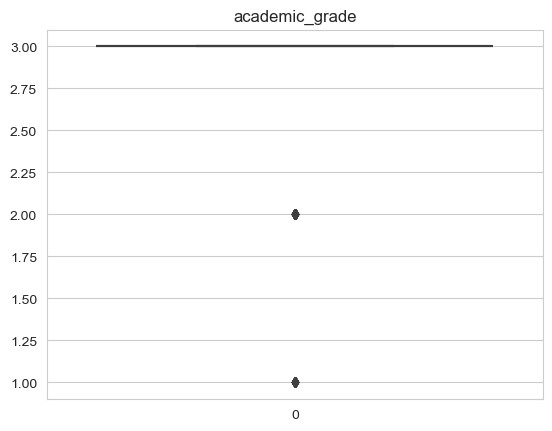

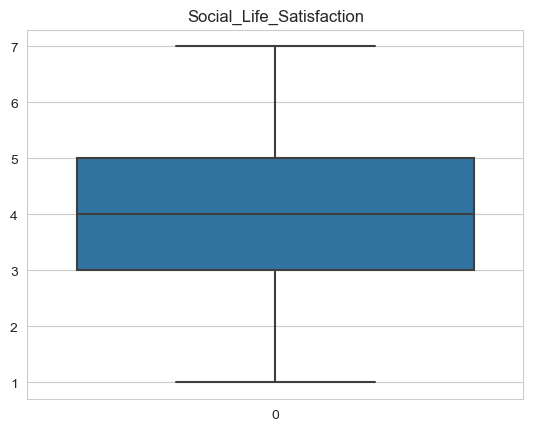

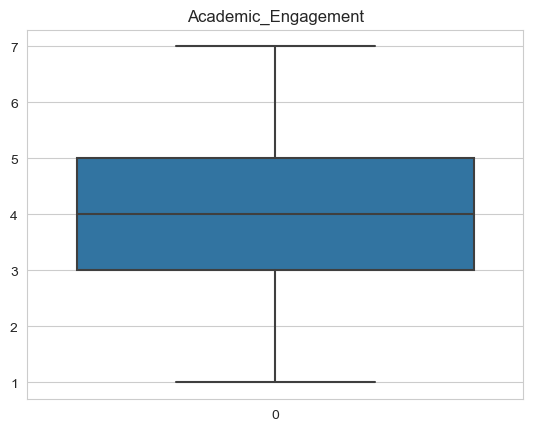

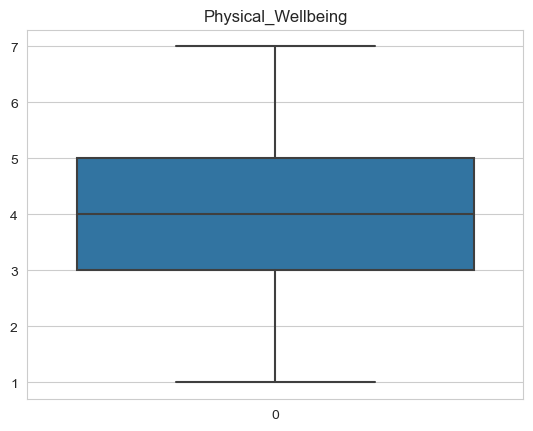

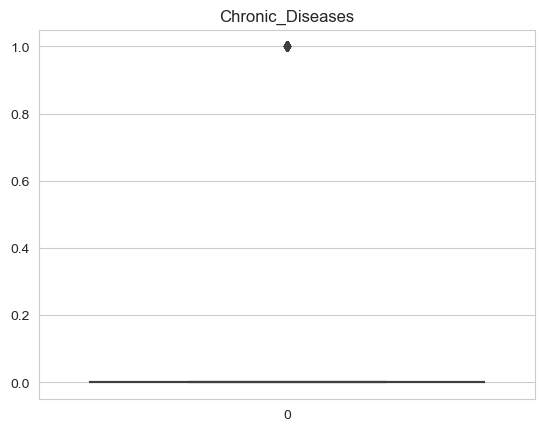

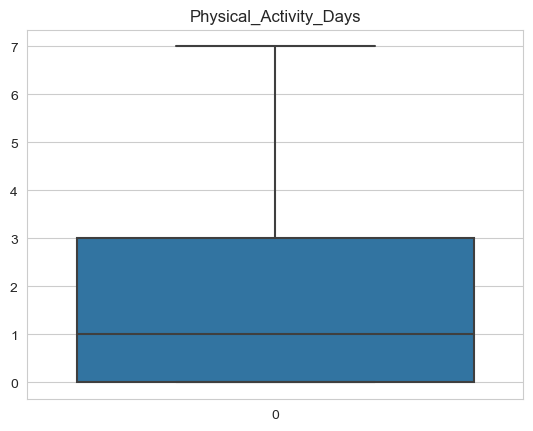

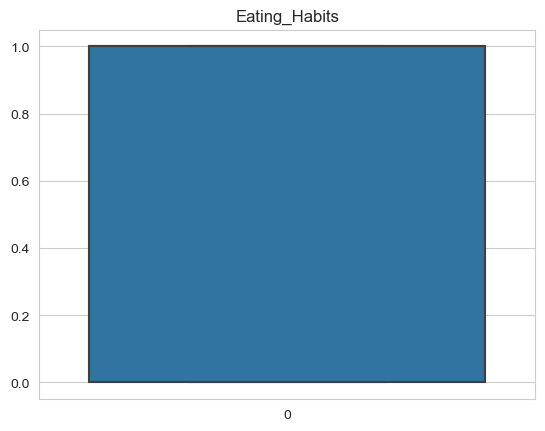

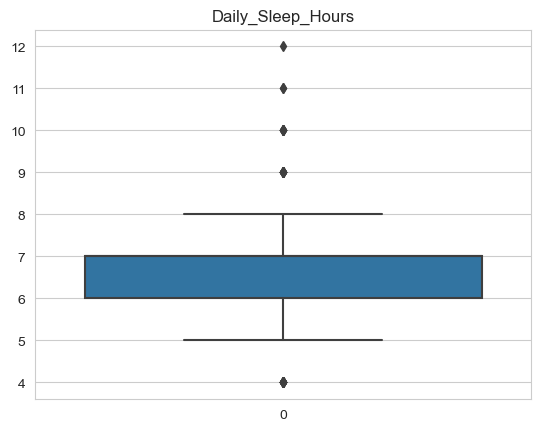

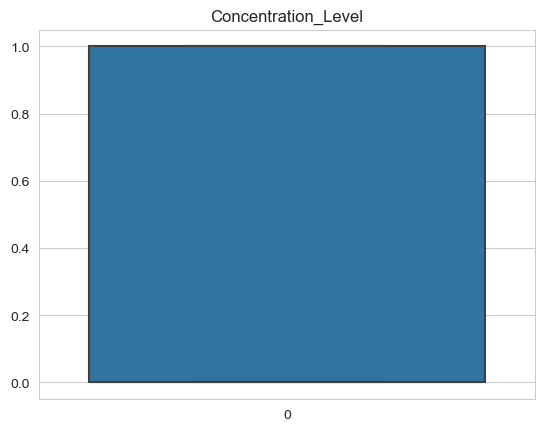

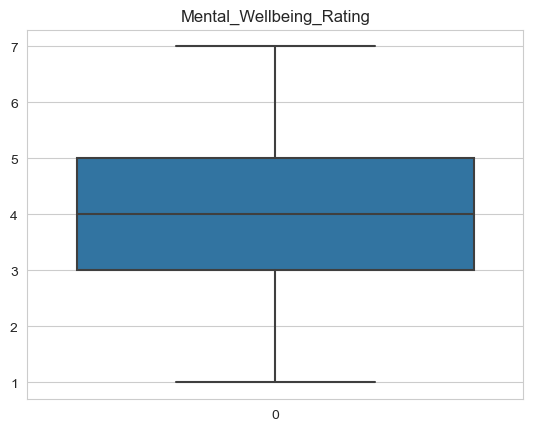

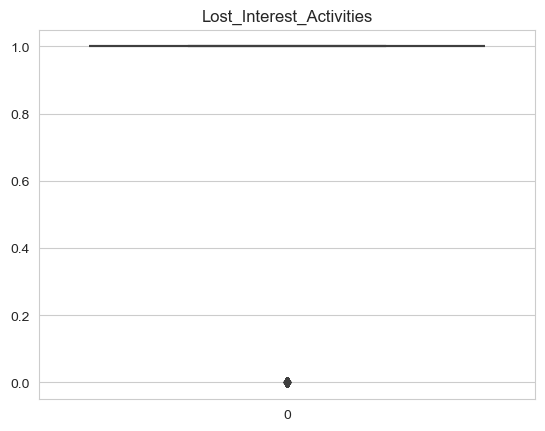

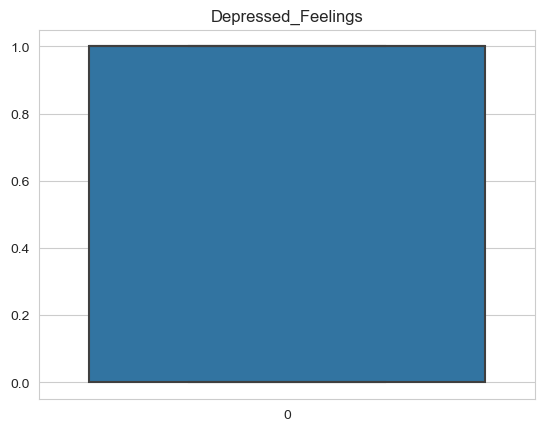

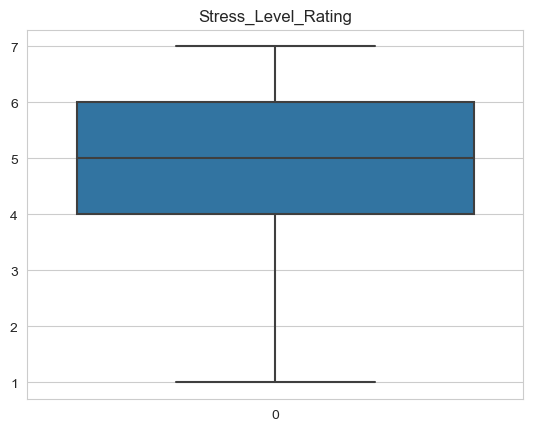

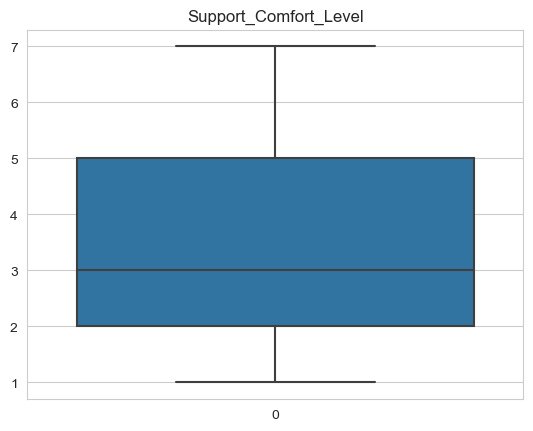

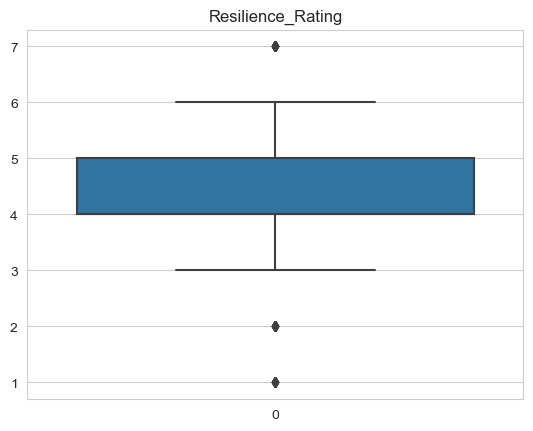

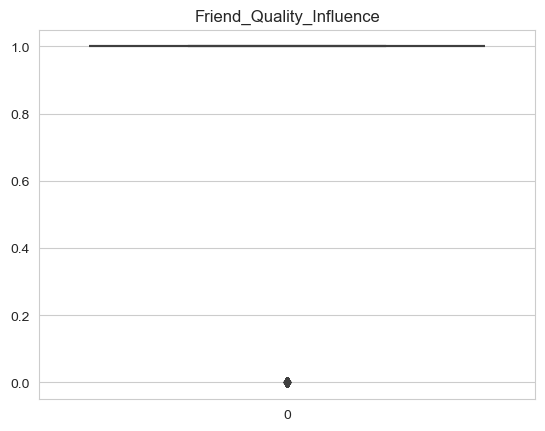

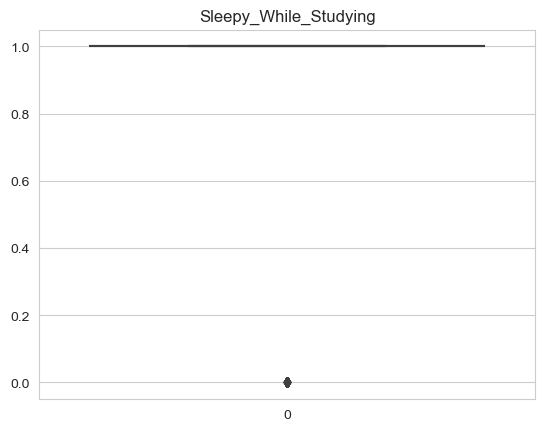

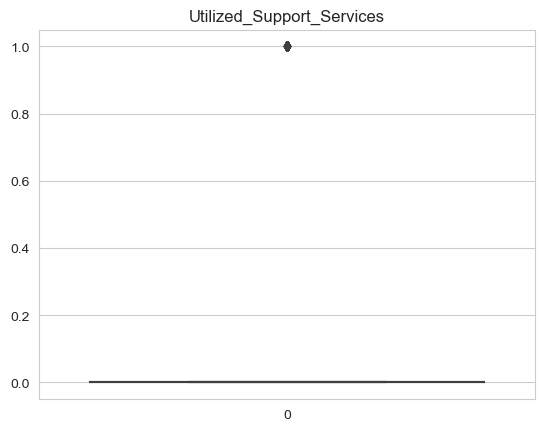

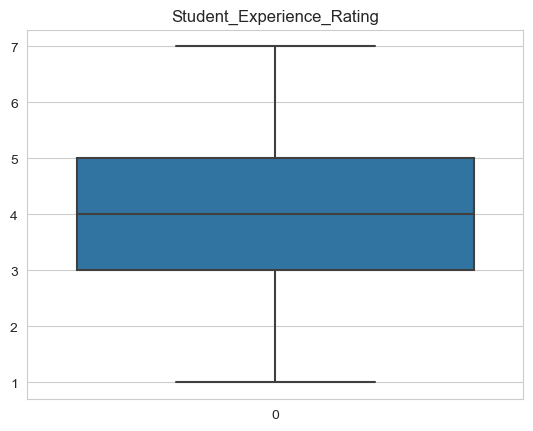

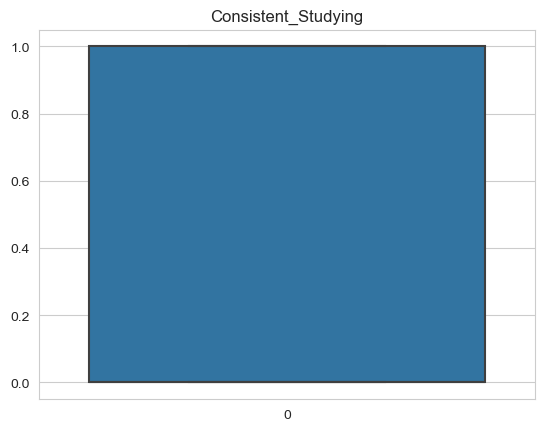

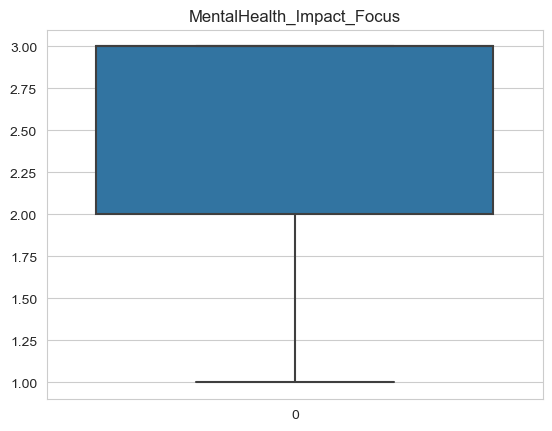

In [191]:
%matplotlib inline
for i , col in enumerate(df.columns):
    if df[col].dtypes != 'object':
        plt.figure(i)
        plt.title(col)
        sns.boxplot(df[col])

# data analysis  : 


##### correlation matrix 

                           academic_grade  Social_Life_Satisfaction  \
academic_grade                   1.000000                  0.149182   
Social_Life_Satisfaction         0.149182                  1.000000   
Academic_Engagement             -0.020978                  0.268667   
Physical_Wellbeing               0.056929                  0.361784   
Chronic_Diseases                -0.005571                 -0.080479   
Physical_Activity_Days          -0.019356                  0.132273   
Eating_Habits                    0.070573                 -0.048108   
Daily_Sleep_Hours                0.065053                  0.151454   
Concentration_Level              0.016716                  0.150391   
Mental_Wellbeing_Rating          0.045449                  0.445884   
Lost_Interest_Activities        -0.067060                 -0.200266   
Depressed_Feelings              -0.070222                 -0.269403   
Stress_Level_Rating             -0.085062                 -0.157141   
Suppor

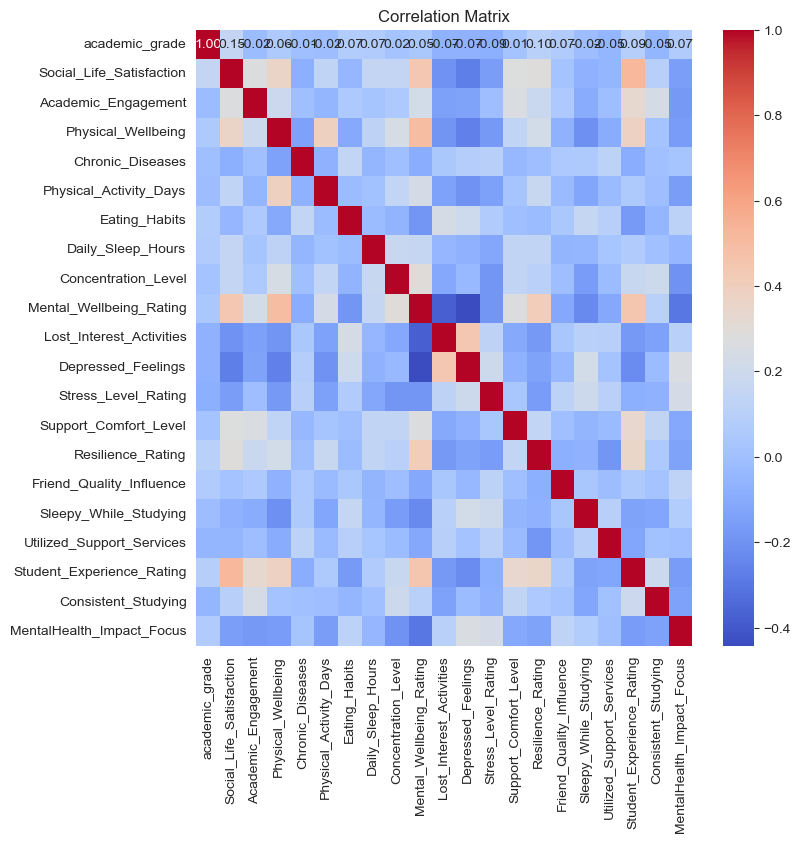

In [199]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)
# Sort the correlation of 'MentalHealth_Impact_Focus' with other columns
mental_health_correlation = correlation_matrix['MentalHealth_Impact_Focus'].sort_values(ascending=False)
print(mental_health_correlation.head(15))  # Display the top correlated features
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##### counts of yes and no for all yes or no questions 

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



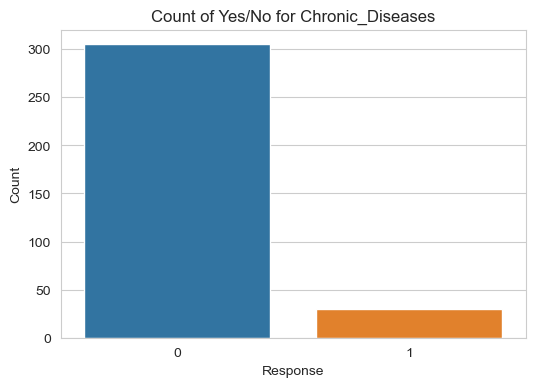

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



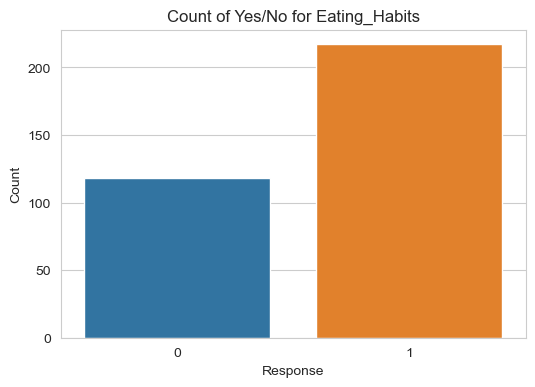

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



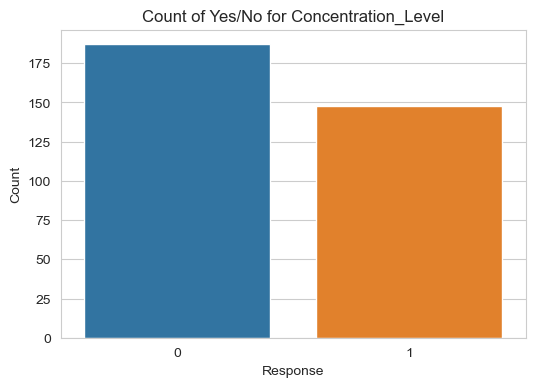

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



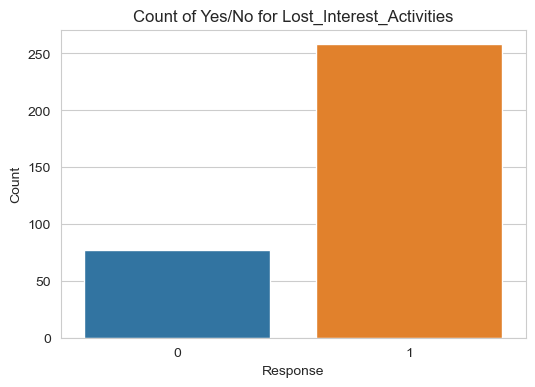

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



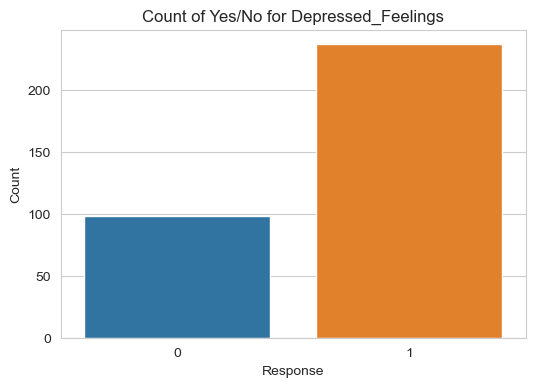

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



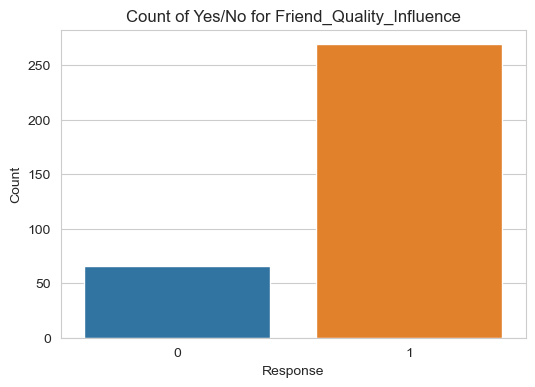

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



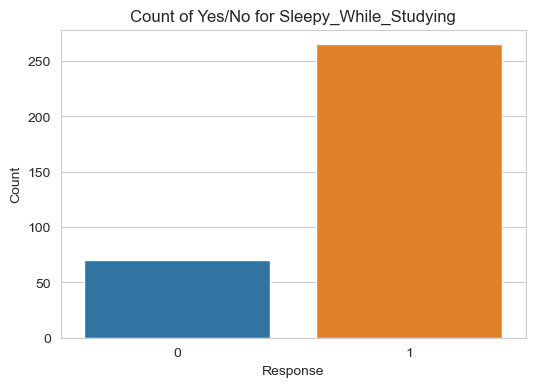

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



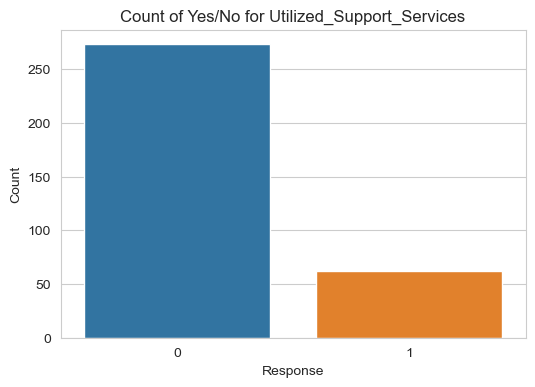

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



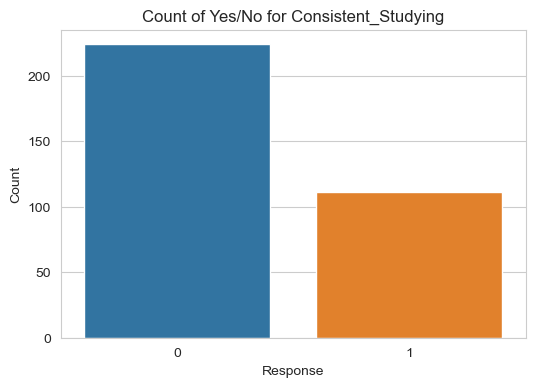

In [193]:
# Identify columns with yes/no questions
yes_no_columns = [col for col in df.columns if df[col].isin([0, 1]).all()]
# Create count plots for each yes/no column
for col in yes_no_columns:
    plt.figure(figsize=(6, 4))  # Adjust figure size if needed
    sns.countplot(x=col, data=df)
    plt.title(f'Count of Yes/No for {col}')
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.show()

##### Columns analysis 

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



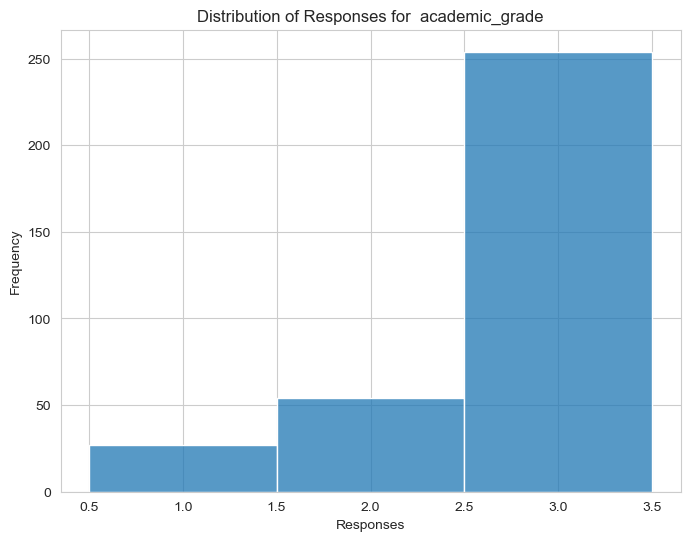

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



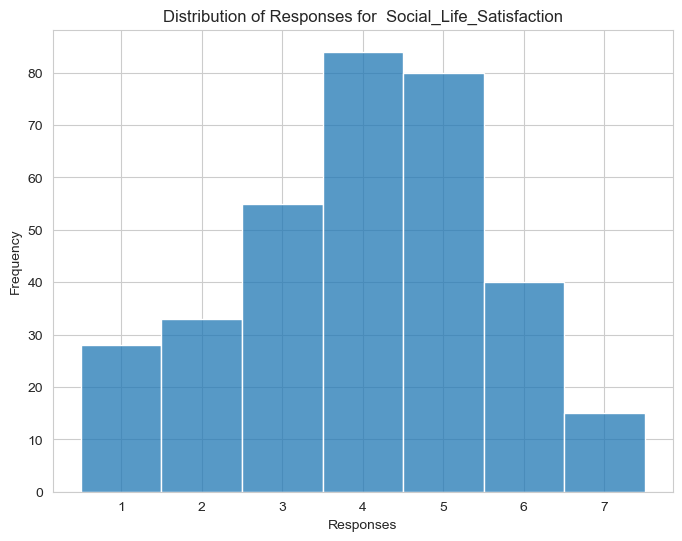

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



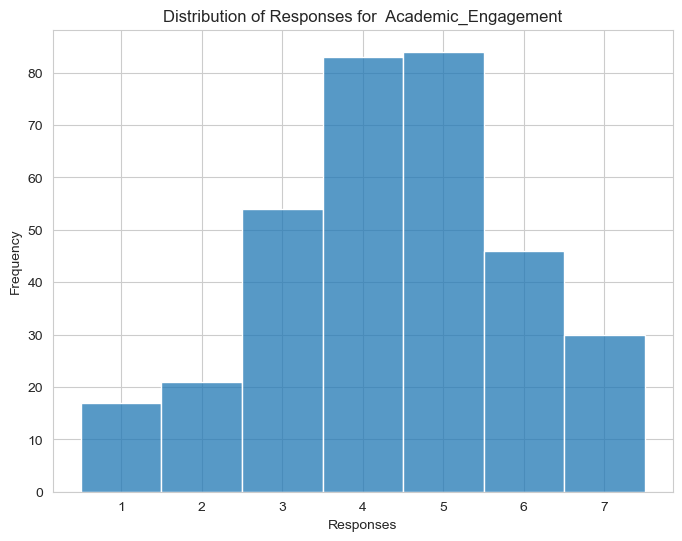

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



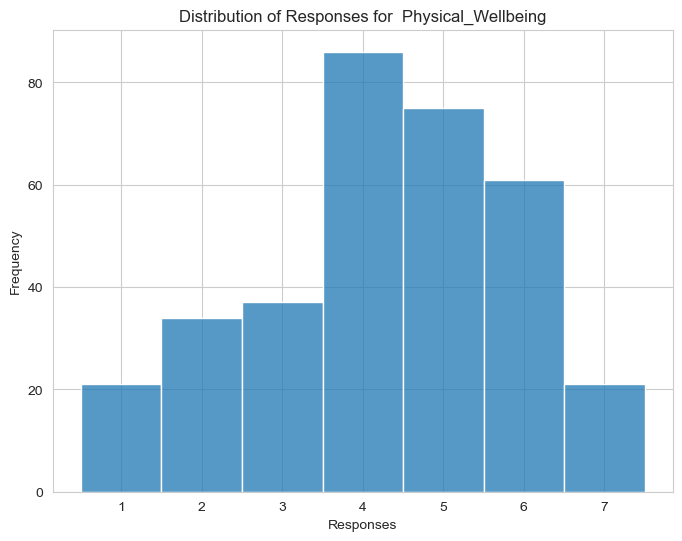

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



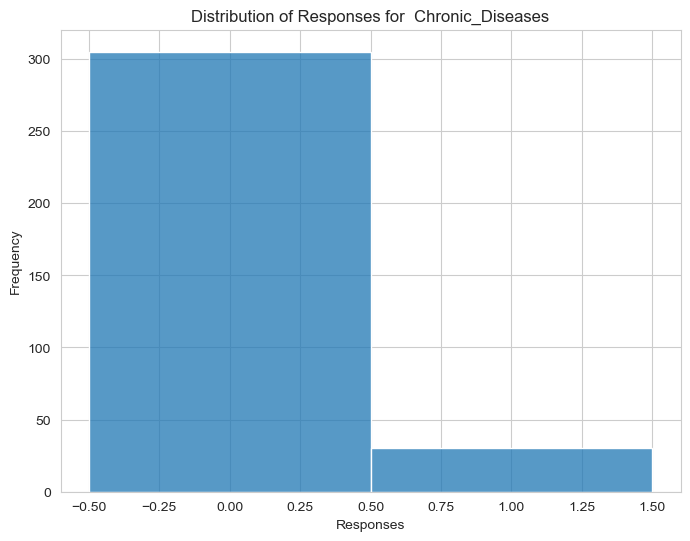

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



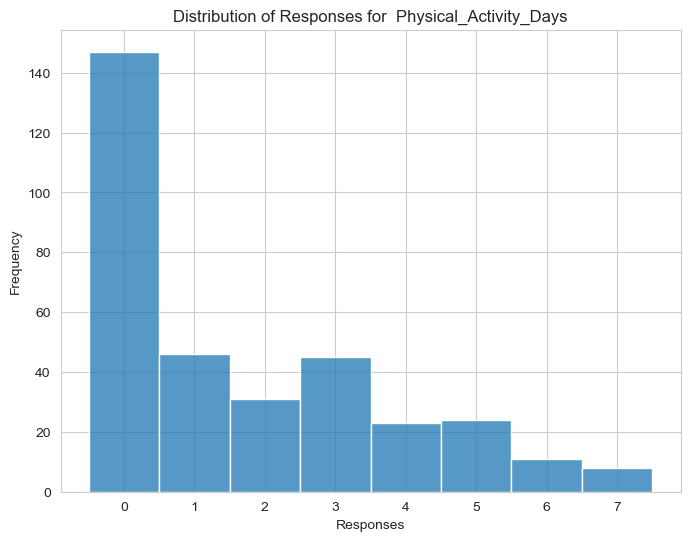

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



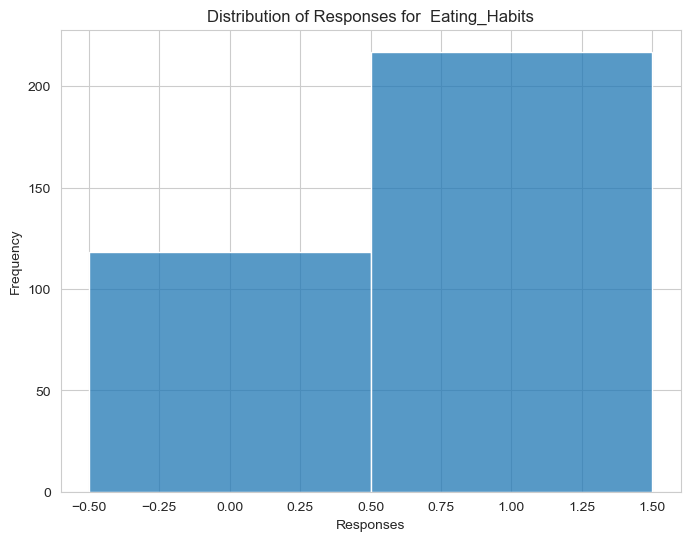

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



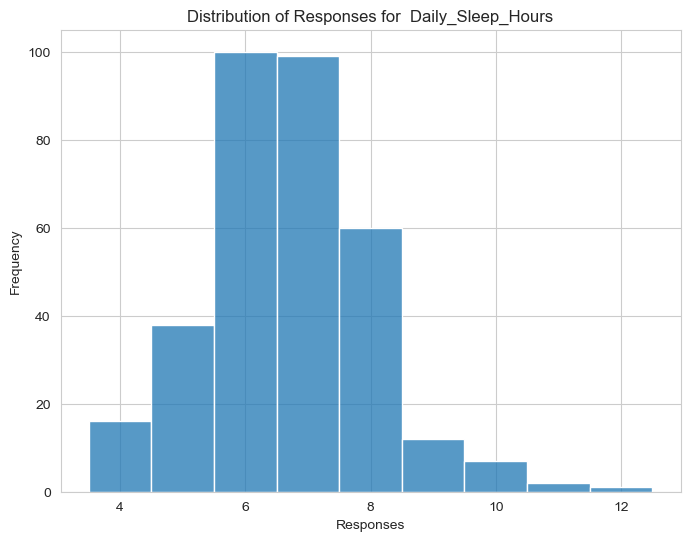

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



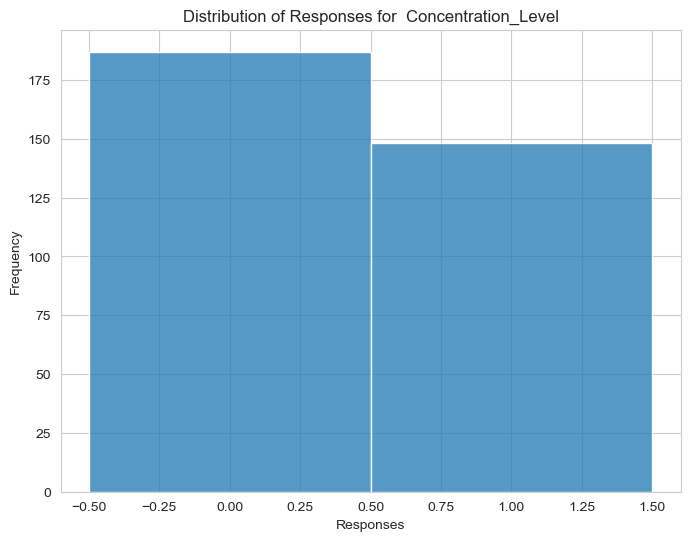

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



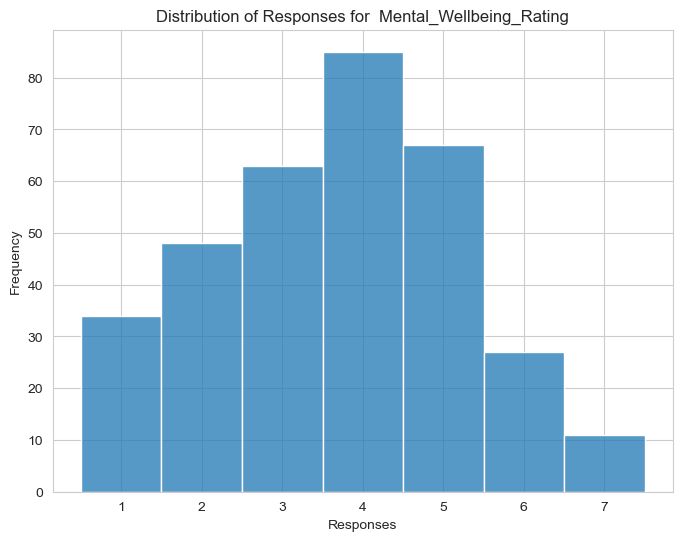

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



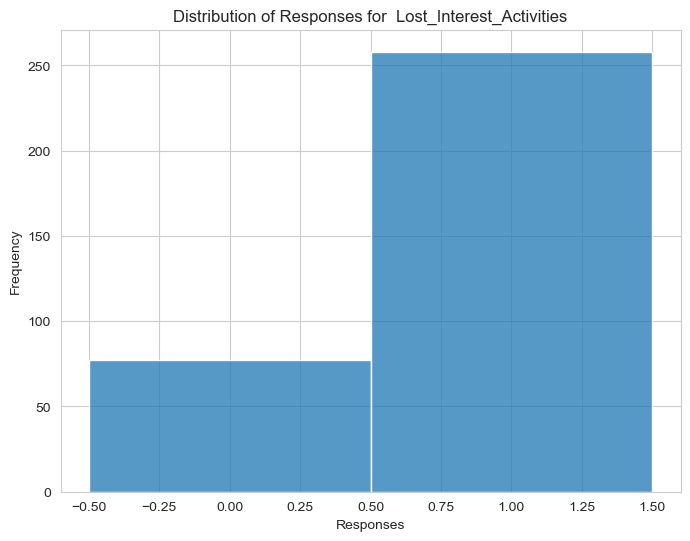

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



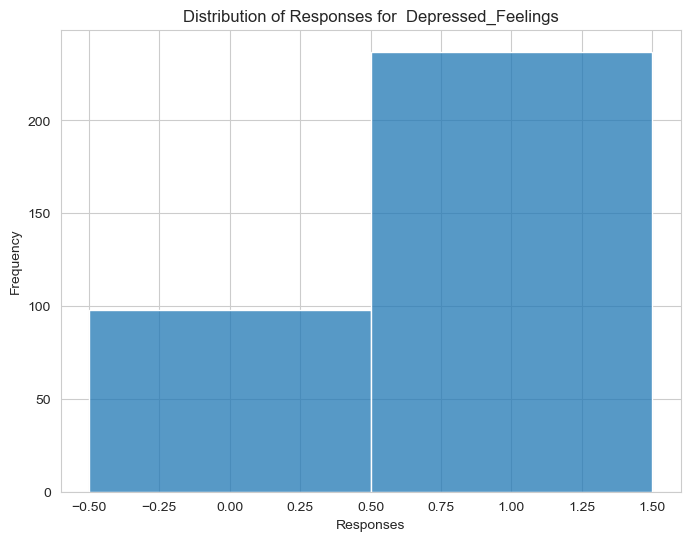

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



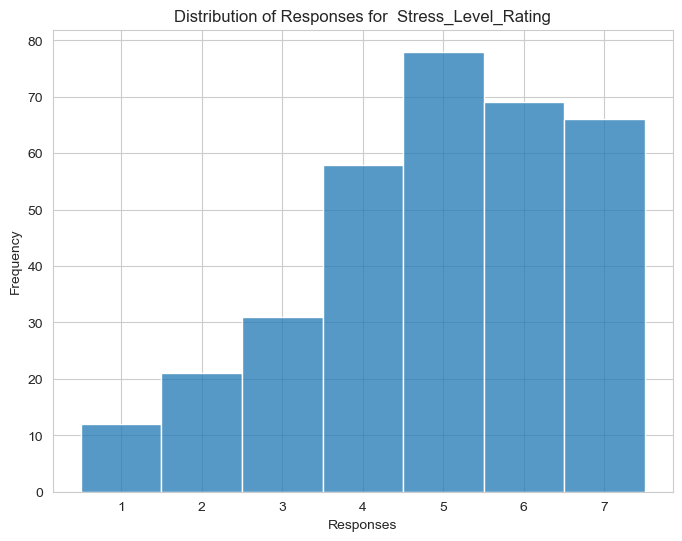

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



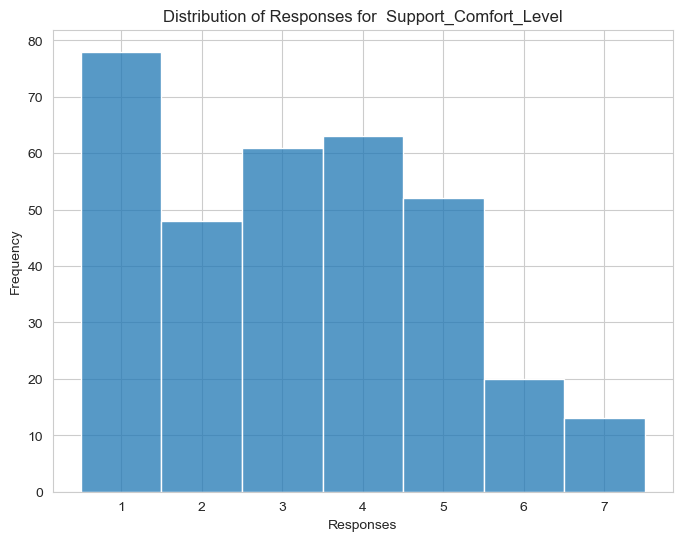

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



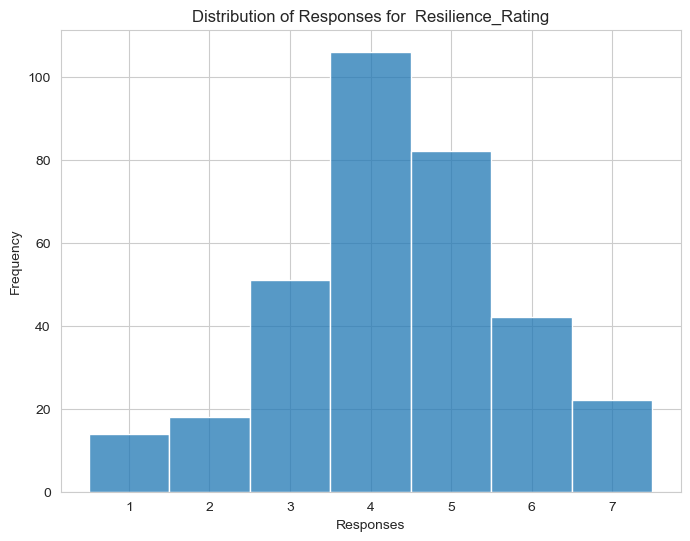

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



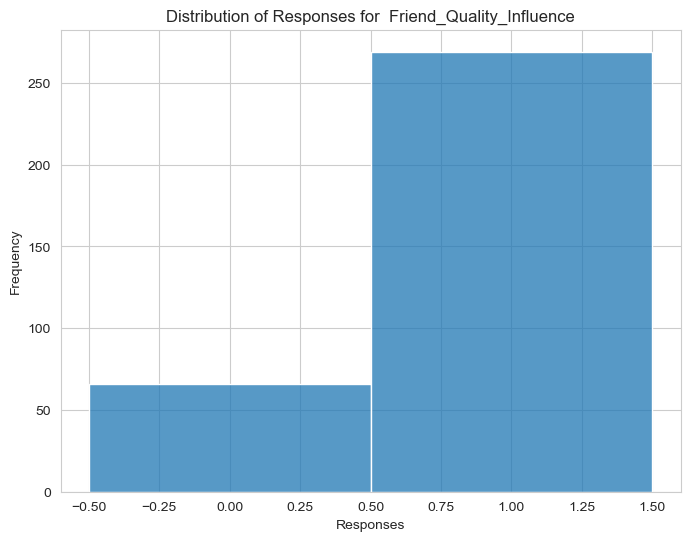

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



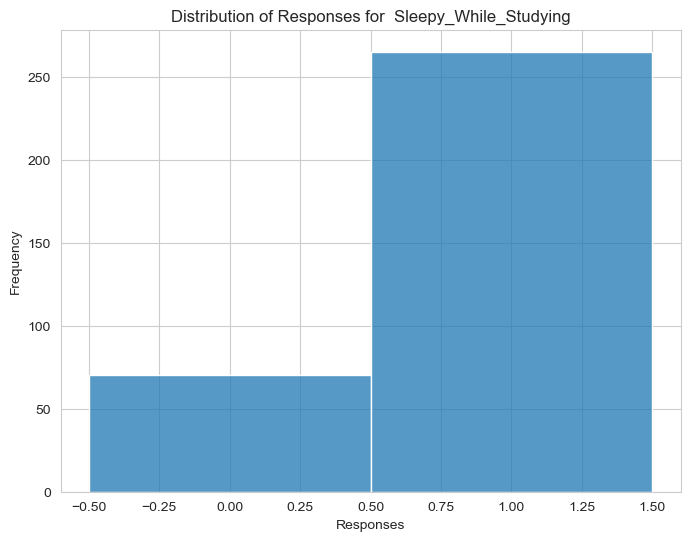

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



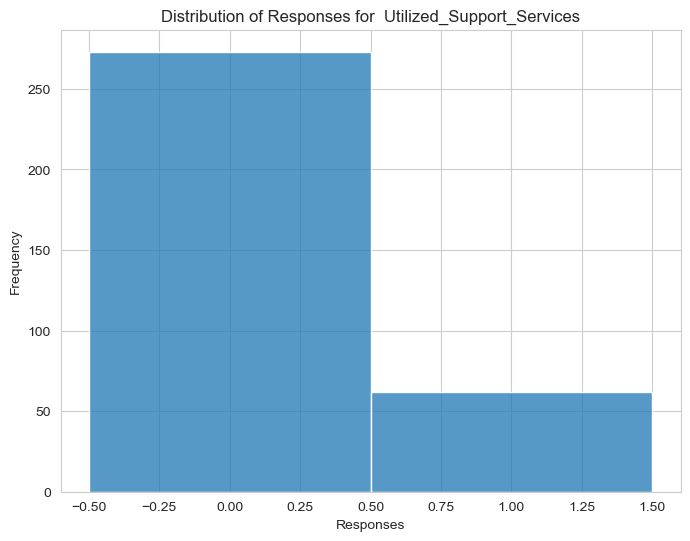

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



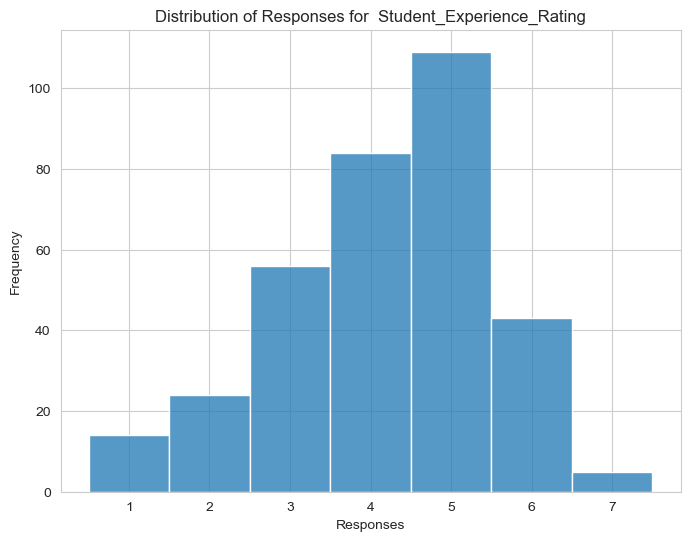

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



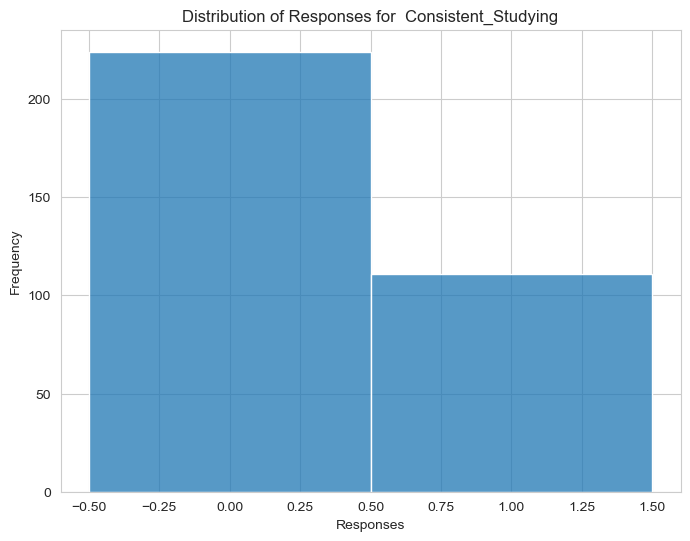

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



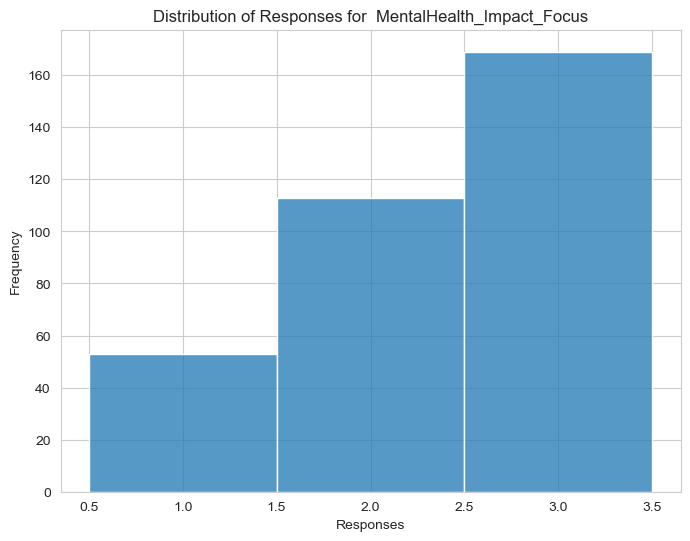

In [145]:
for col in df:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(df[col], bins=10, discrete=True)
    plt.title(f'Distribution of Responses for  {col}')
    plt.xlabel('Responses')
    plt.ylabel('Frequency')
    plt.show()

##### how mental health impact focus on studies 

In [146]:
mean_IMP = df['MentalHealth_Impact_Focus'].mean()
median_IMP = df['MentalHealth_Impact_Focus'].median()
std_IMP = df['MentalHealth_Impact_Focus'].std()

print(f"Mean MentalHealth_Impact_Focus: {mean_IMP:.2f}")
print(f"Median MentalHealth_Impact_Focus: {median_IMP:.2f}")
print(f"Standard deviation of MentalHealth_Impact_Focus: {std_IMP:.2f}")

Mean MentalHealth_Impact_Focus: 2.35
Median MentalHealth_Impact_Focus: 3.00
Standard deviation of MentalHealth_Impact_Focus: 0.74


C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



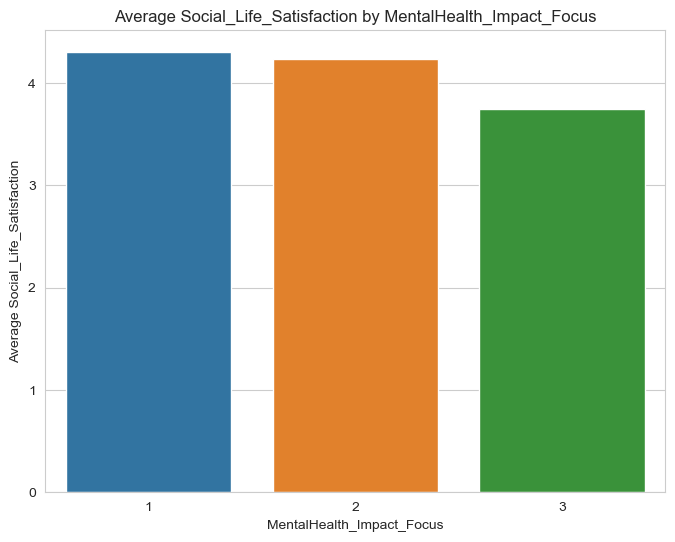

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



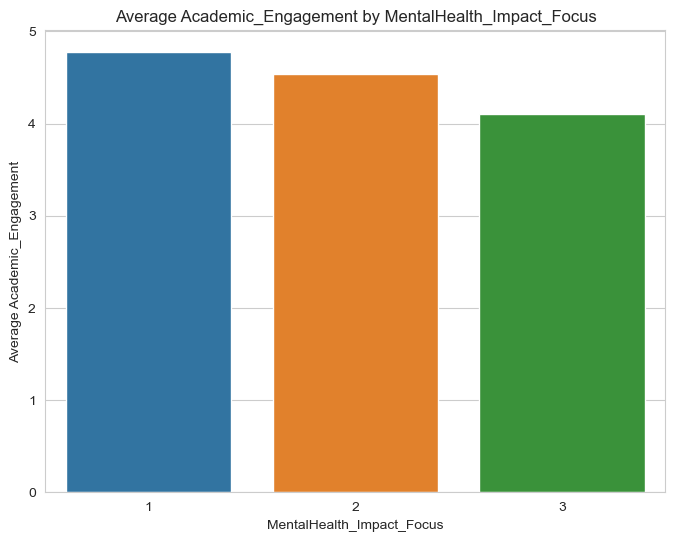

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



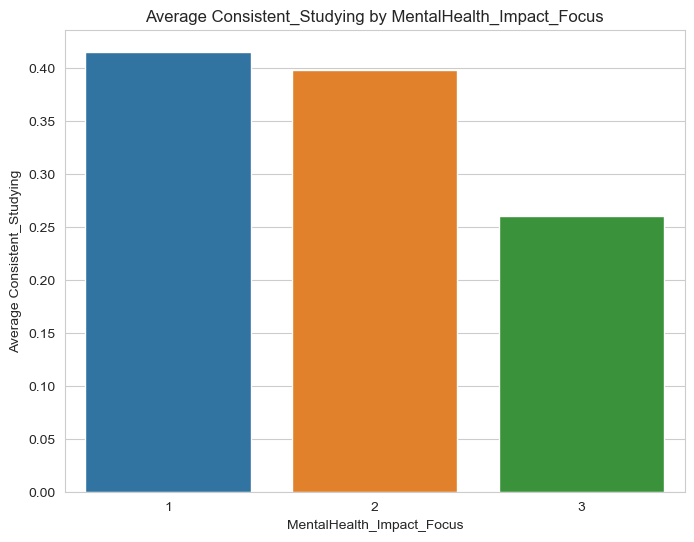

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



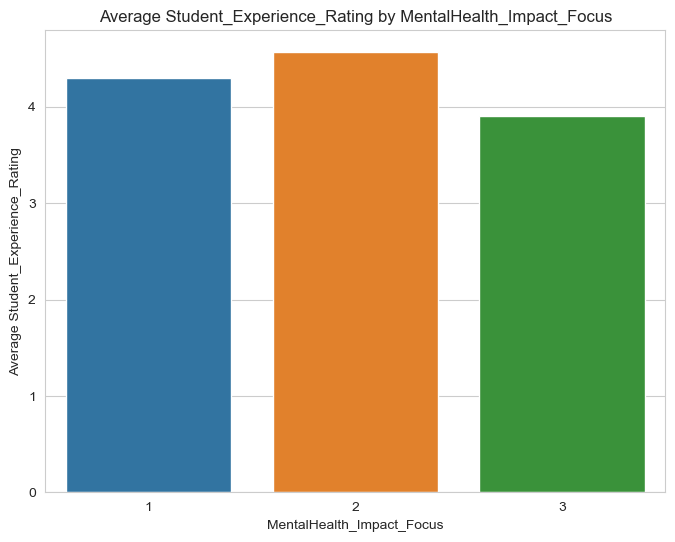

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



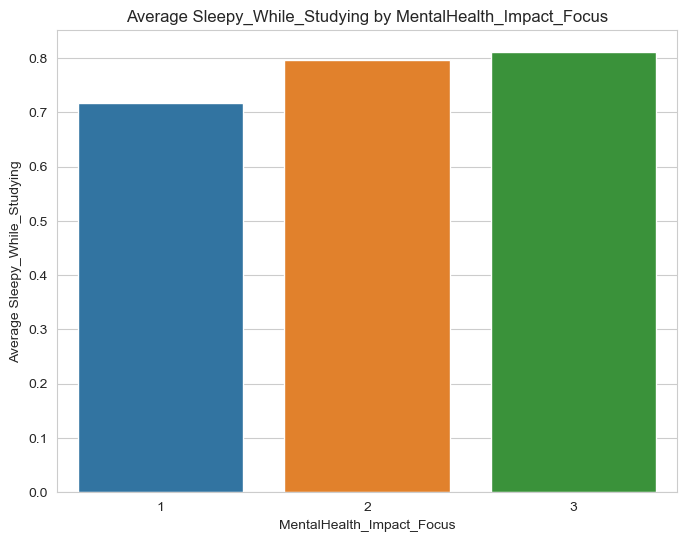

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



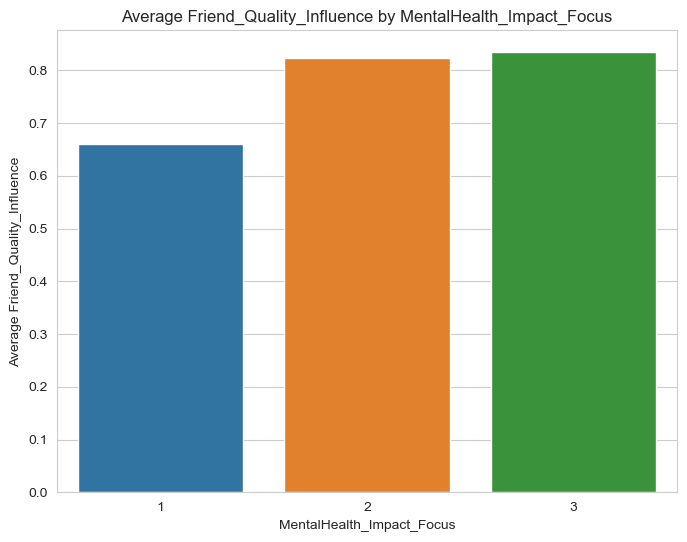

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



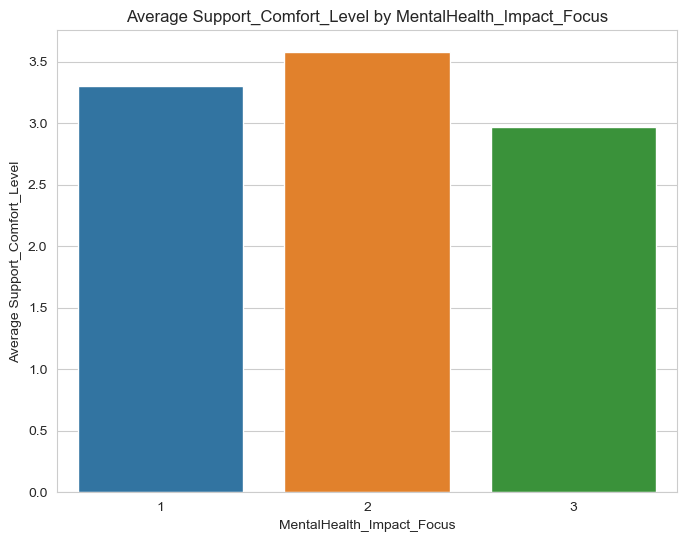

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



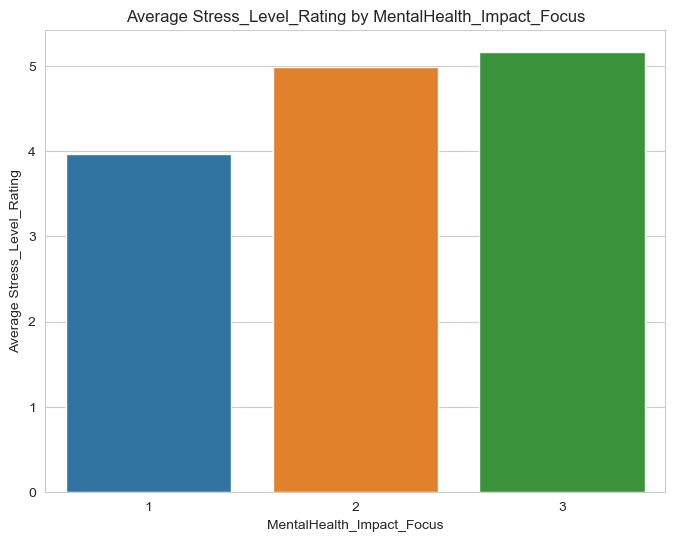

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



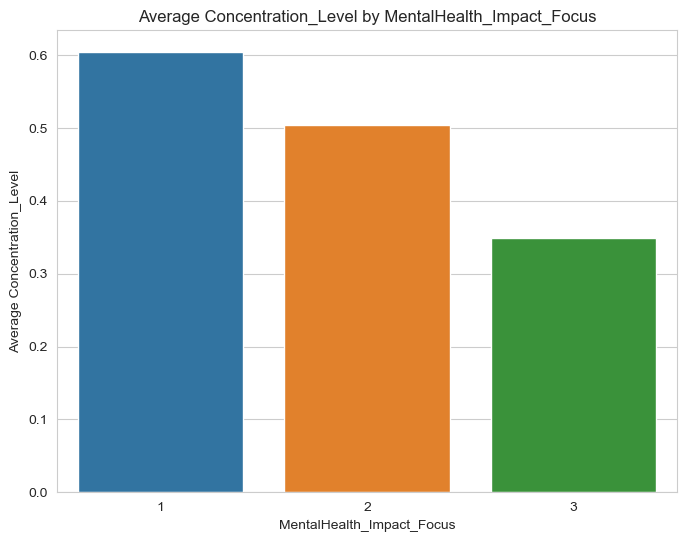

In [147]:
features_of_interest = [
    'Social_Life_Satisfaction', 'Academic_Engagement', 'Consistent_Studying',
    'Student_Experience_Rating', 'Sleepy_While_Studying', 'Friend_Quality_Influence',
    'Support_Comfort_Level',
     'Stress_Level_Rating',
    'Concentration_Level'
]
MentalHealth_Impact_Focus_grouped = df.groupby('MentalHealth_Impact_Focus')[features_of_interest].mean().reset_index()

# Plotting bar plots for each feature
for feature in features_of_interest:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='MentalHealth_Impact_Focus', y=feature, data=MentalHealth_Impact_Focus_grouped)
    plt.title(f'Average {feature} by MentalHealth_Impact_Focus')
    plt.xlabel('MentalHealth_Impact_Focus')
    plt.ylabel(f'Average {feature}')
    plt.show()

##### Mental health well-being

In [148]:
mean_MWR = df['Student_Experience_Rating'].mean()
median_MWR = df['Student_Experience_Rating'].median()
std_MWR = df['Student_Experience_Rating'].std()

print(f"Student_Experience_Ratingt: {mean_MWR:.2f}")
print(f"Student_Experience_Rating: {median_MWR:.2f}")
print(f"Student_Experience_Rating: {std_MWR:.2f}")

Student_Experience_Ratingt: 4.19
Student_Experience_Rating: 4.00
Student_Experience_Rating: 1.33


C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



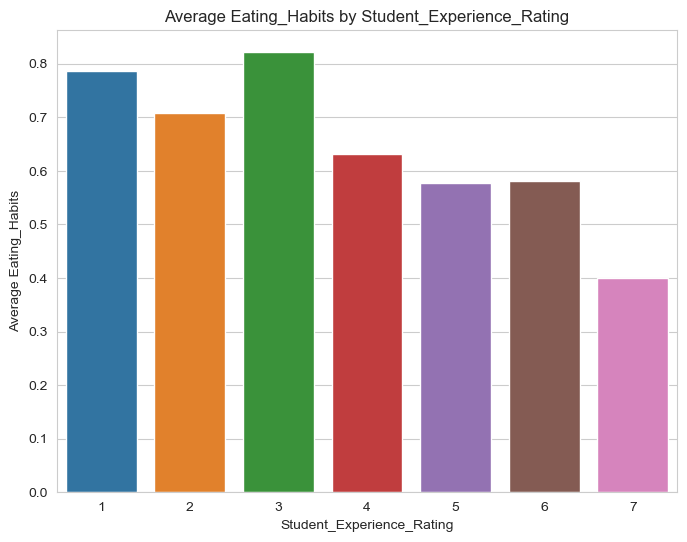

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



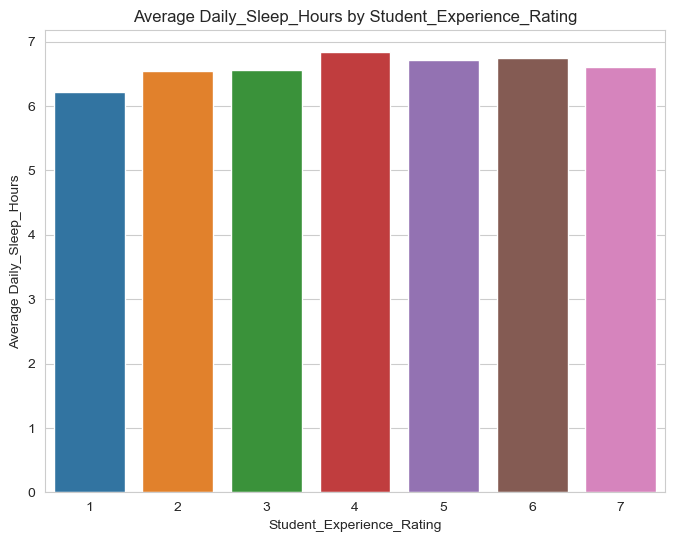

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



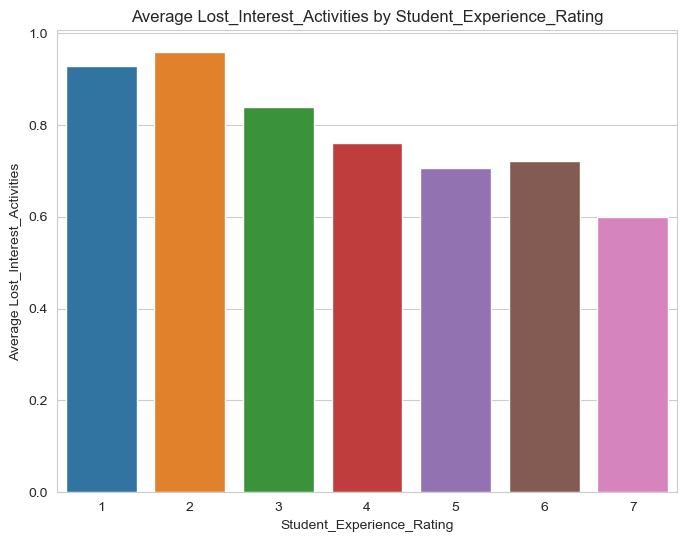

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



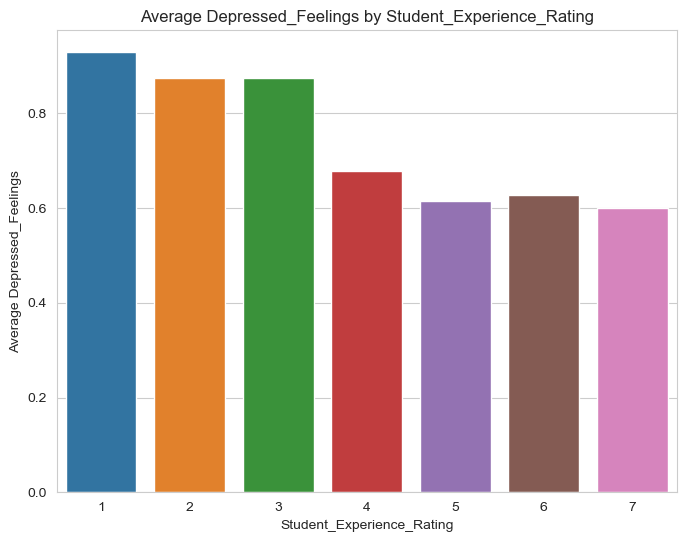

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



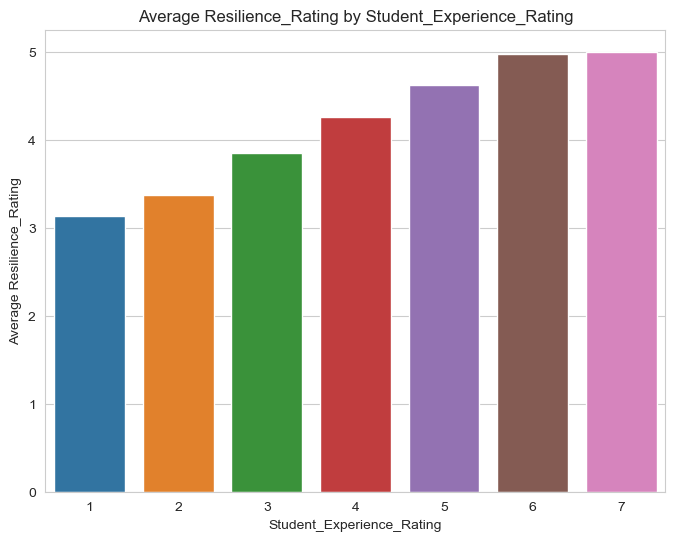

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



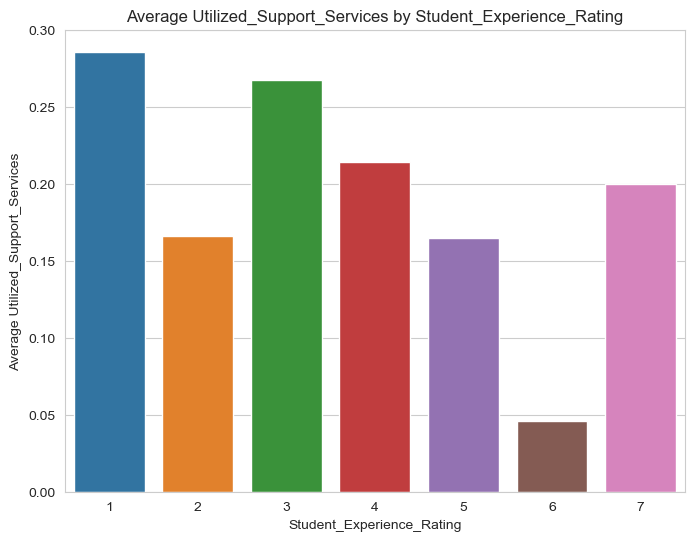

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



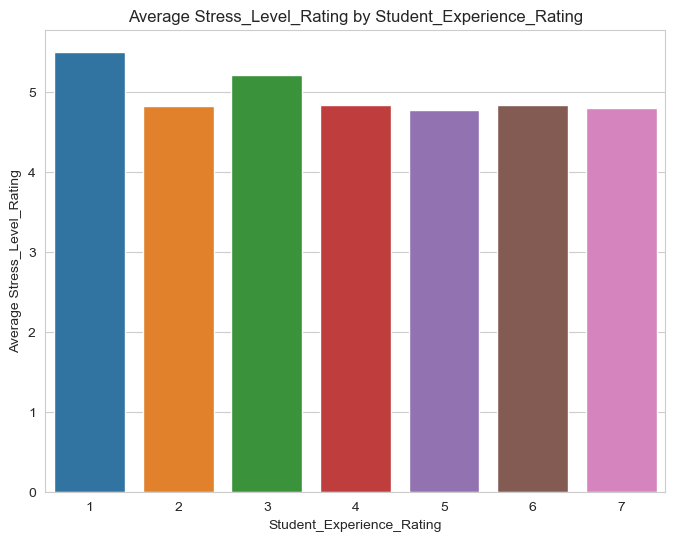

In [149]:
features_of_interest = [
    'Eating_Habits', 'Daily_Sleep_Hours', 'Lost_Interest_Activities',
    'Depressed_Feelings', 'Resilience_Rating', 'Utilized_Support_Services' , 'Stress_Level_Rating'
]
Mental_Wellbeing_Rating_grouped = df.groupby('Student_Experience_Rating')[features_of_interest].mean().reset_index()
# Plotting bar plots for each feature
for feature in features_of_interest:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Student_Experience_Rating', y=feature, data=Mental_Wellbeing_Rating_grouped)
    plt.title(f'Average {feature} by Student_Experience_Rating')
    plt.xlabel('Student_Experience_Rating')
    plt.ylabel(f'Average {feature}')
    plt.show()
    

##### how physical health impact stress level and Academic_Engagement

In [150]:
mean_PW = df['Physical_Wellbeing'].mean()
median_PW = df['Physical_Wellbeing'].median()
std_PW = df['Physical_Wellbeing'].std()

print(f"Physical_Wellbeing: {mean_PW:.2f}")
print(f"Physical_Wellbeing: {median_PW:.2f}")
print(f"Physical_Wellbeing: {std_PW:.2f}")

Physical_Wellbeing: 4.27
Physical_Wellbeing: 4.00
Physical_Wellbeing: 1.59


C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



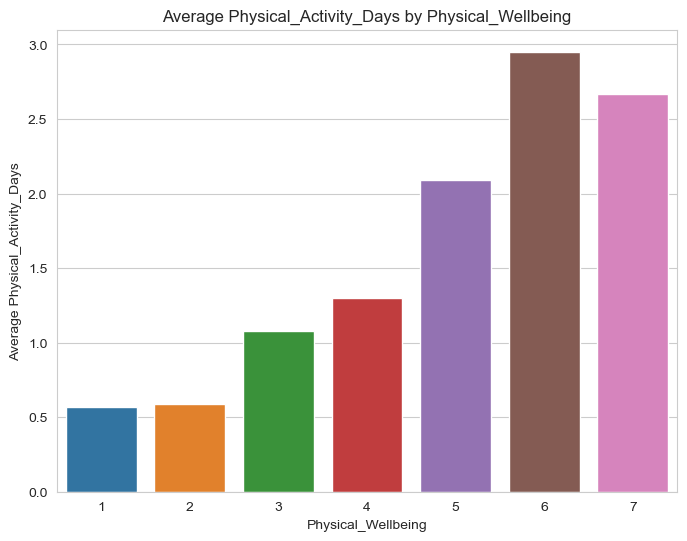

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



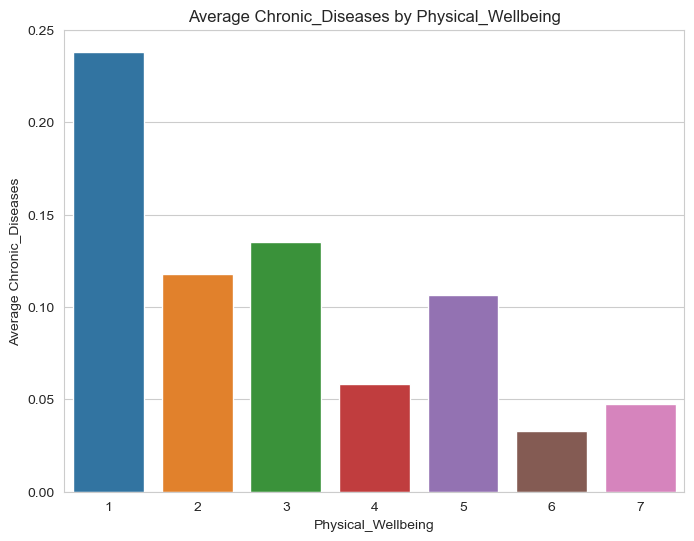

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



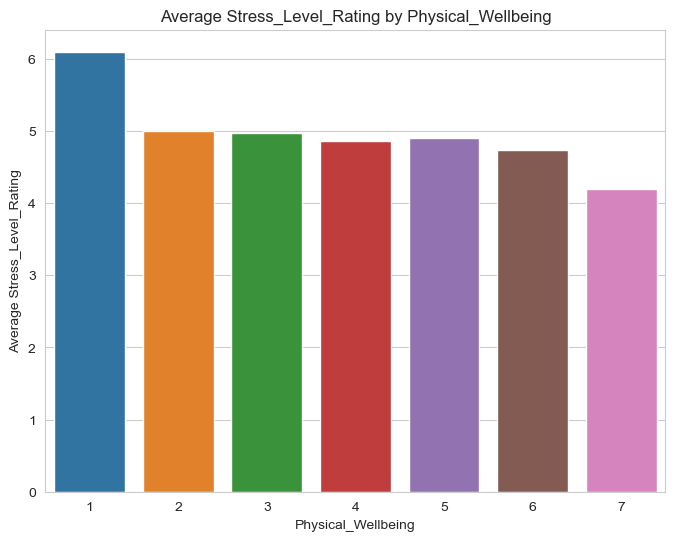

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



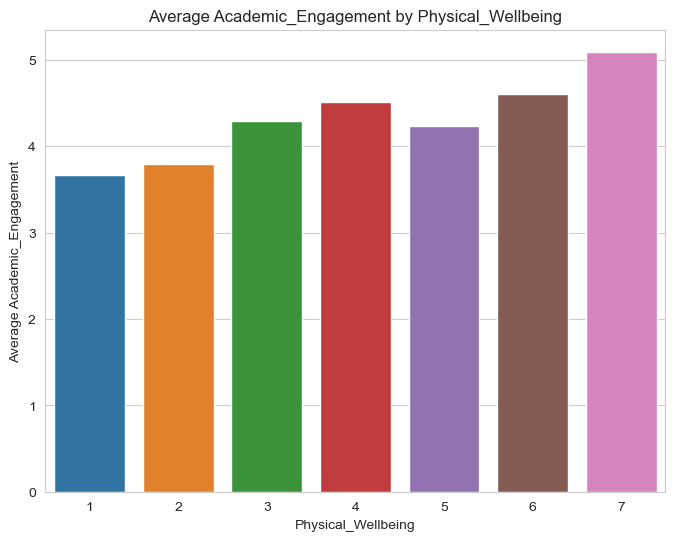

In [151]:
features_of_interest = [
    'Physical_Activity_Days', 'Chronic_Diseases' ,'Stress_Level_Rating' ,'Academic_Engagement'
]
Physical_Wellbeing_grouped = df.groupby('Physical_Wellbeing')[features_of_interest].mean().reset_index()
# Plotting bar plots for each feature
for feature in features_of_interest:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Physical_Wellbeing', y=feature, data=Physical_Wellbeing_grouped)
    plt.title(f'Average {feature} by Physical_Wellbeing')
    plt.xlabel('Physical_Wellbeing')
    plt.ylabel(f'Average {feature}')
    plt.show()

Other 

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



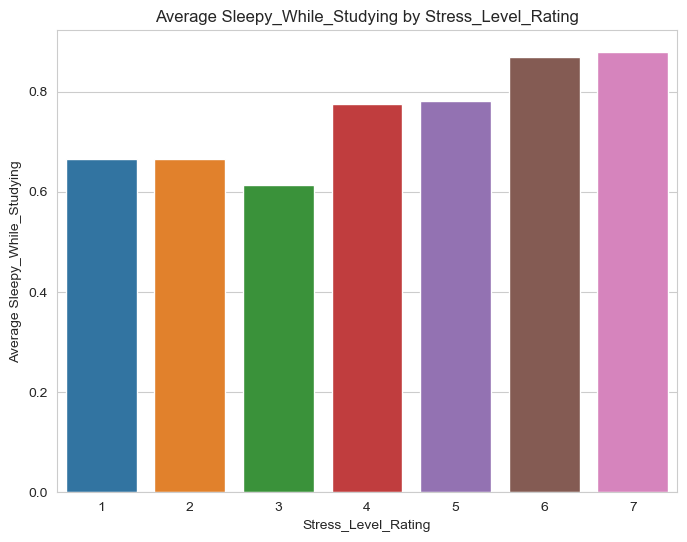

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



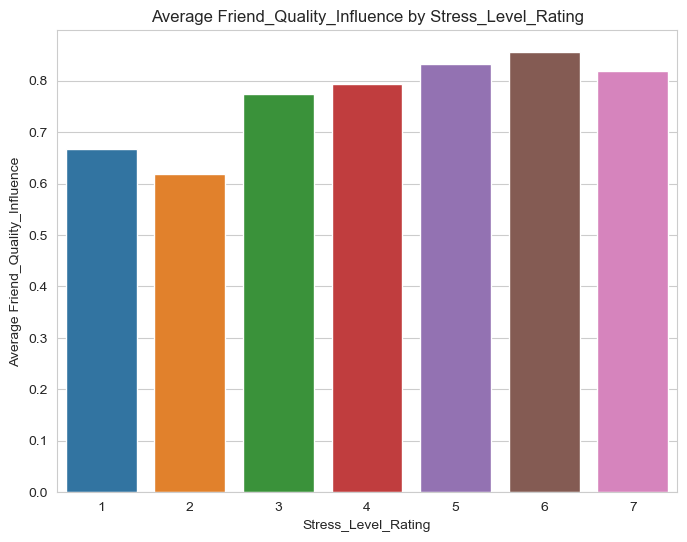

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MSI\anaconda3\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



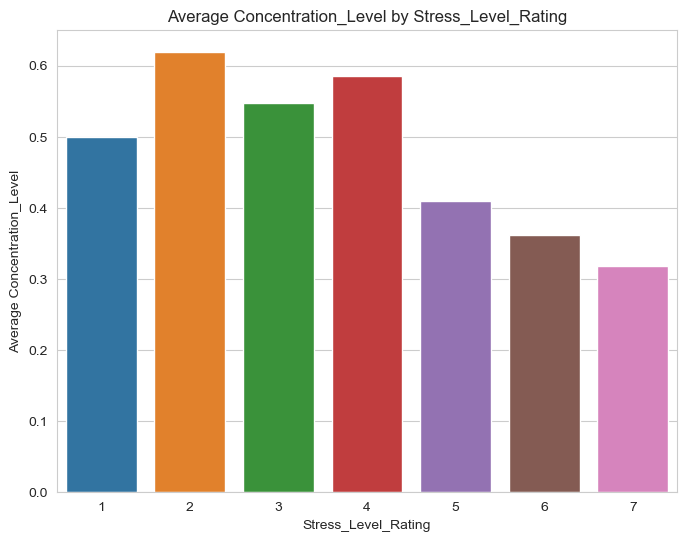

In [152]:
features_of_interest = [
     'Sleepy_While_Studying', 'Friend_Quality_Influence',
    'Concentration_Level'
]
MentalHealth_Impact_Focus_grouped = df.groupby('Stress_Level_Rating')[features_of_interest].mean().reset_index()

# Plotting bar plots for each feature
for feature in features_of_interest:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Stress_Level_Rating', y=feature, data=MentalHealth_Impact_Focus_grouped)
    plt.title(f'Average {feature} by Stress_Level_Rating')
    plt.xlabel('Stress_Level_Rating')
    plt.ylabel(f'Average {feature}')
    plt.show()

##### establishment do not impact stress level 

In [153]:
stress_by_establishment = df.groupby('academic_grade')['Stress_Level_Rating'].mean().reset_index()

# Sorting establishments by mean stress level (optional)
stress_by_establishment = stress_by_establishment.sort_values('Stress_Level_Rating', ascending=False)

# Creating an interactive bar plot with Plotly
fig = px.bar(stress_by_establishment, x='academic_grade', y='Stress_Level_Rating',
             labels={'Establishment': 'Establishment', 'Stress_Level_Rating': 'Average Stress Level'},
             title='Average Stress Level by Establishment')

# Update layout for better readability
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Establishment', yaxis_title='Average Stress Level')

fig.show()

##### How mental health and phisical health can impact  ability to focus on studies

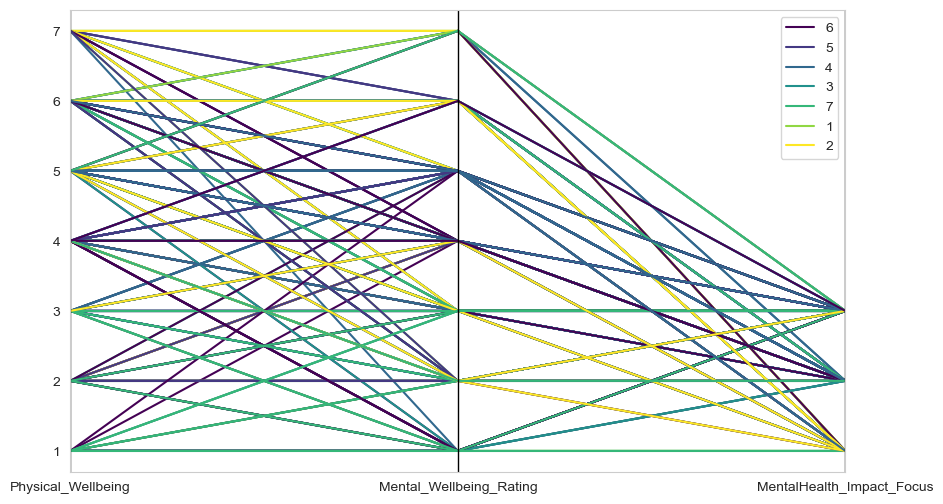

In [154]:

plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df[['Physical_Wellbeing','Mental_Wellbeing_Rating','MentalHealth_Impact_Focus','Stress_Level_Rating']], 'Stress_Level_Rating', colormap='viridis')


plt.show()


### select the best algorithme

Stress_Level_Rating

In [155]:

X = df.drop('Stress_Level_Rating', axis=1)
y = df['Stress_Level_Rating']

k = 3
selector = SelectKBest(score_func=f_classif, k=k)


X_selected = selector.fit_transform(X, y)


selected_indices = selector.get_support(indices=True)


selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['Mental_Wellbeing_Rating', 'Depressed_Feelings',
       'Student_Experience_Rating'],
      dtype='object')


MentalHealth_Impact_Focus

In [156]:
# Assuming the target variable is in the 'target' column
X = df.drop('MentalHealth_Impact_Focus', axis=1)
y = df['MentalHealth_Impact_Focus']

# Select the number of features you want to keep (k)
k = 3

# Initialize SelectKBest with the scoring function and k value
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform your data
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the selected features
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['Mental_Wellbeing_Rating', 'Depressed_Feelings', 'Stress_Level_Rating'], dtype='object')


Depressed_Feelings

In [157]:
# Assuming the target variable is in the 'target' column
X = df.drop('Depressed_Feelings', axis=1)
y = df['Depressed_Feelings']

# Select the number of features you want to keep (k)
k = 3

# Initialize SelectKBest with the scoring function and k value
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform your data
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the selected features
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['Social_Life_Satisfaction', 'Mental_Wellbeing_Rating',
       'Lost_Interest_Activities'],
      dtype='object')


Academic_Engagement

In [158]:
# Assuming the target variable is in the 'target' column
X = df.drop('Academic_Engagement', axis=1)
y = df['Academic_Engagement']

# Select the number of features you want to keep (k)
k = 3

# Initialize SelectKBest with the scoring function and k value
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform your data
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the selected features
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['Social_Life_Satisfaction', 'Mental_Wellbeing_Rating',
       'Student_Experience_Rating'],
      dtype='object')


Student_Experience_Rating

In [159]:
# Assuming the target variable is in the 'target' column
X = df.drop('Student_Experience_Rating', axis=1)
y = df['Student_Experience_Rating']

# Select the number of features you want to keep (k)
k = 3

# Initialize SelectKBest with the scoring function and k value
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform your data
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the selected features
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['Social_Life_Satisfaction', 'Physical_Wellbeing',
       'Mental_Wellbeing_Rating'],
      dtype='object')


Daily_Sleep_Hours

In [160]:
# Assuming the target variable is in the 'target' column
X = df.drop('Daily_Sleep_Hours', axis=1)
y = df['Daily_Sleep_Hours']

# Select the number of features you want to keep (k)
k = 3

# Initialize SelectKBest with the scoring function and k value
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform your data
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the selected features
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['Social_Life_Satisfaction', 'Physical_Wellbeing',
       'Mental_Wellbeing_Rating'],
      dtype='object')


Utilized_Support_Services

In [194]:
# Assuming the target variable is in the 'target' column
X = df.drop('Utilized_Support_Services', axis=1)
y = df['Utilized_Support_Services']

# Select the number of features you want to keep (k)
k = 3

# Initialize SelectKBest with the scoring function and k value
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform your data
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the selected features
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)


Selected Features: Index(['Chronic_Diseases', 'Resilience_Rating', 'Student_Experience_Rating'], dtype='object')


Consistent_Studying

In [196]:
# Assuming the target variable is in the 'target' column
X = df.drop('Concentration_Level', axis=1)
y = df['Concentration_Level']

# Select the number of features you want to keep (k)
k = 3

# Initialize SelectKBest with the scoring function and k value
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform your data
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the selected features
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['Physical_Wellbeing', 'Mental_Wellbeing_Rating',
       'MentalHealth_Impact_Focus'],
      dtype='object')


In [86]:
df.sample(10)

,academic_grade,Social_Life_Satisfaction,Academic_Engagement,Physical_Wellbeing,Chronic_Diseases,Physical_Activity_Days,Eating_Habits,Daily_Sleep_Hours,Concentration_Level,Mental_Wellbeing_Rating,...,Depressed_Feelings,Stress_Level_Rating,Support_Comfort_Level,Resilience_Rating,Friend_Quality_Influence,Sleepy_While_Studying,Utilized_Support_Services,Student_Experience_Rating,Consistent_Studying,MentalHealth_Impact_Focus
92,1,5,6,6,0,2,0,8,1,4,...,1,5,2,5,0,1,0,5,0,2
196,3,6,4,4,0,1,1,7,1,4,...,1,5,6,5,1,1,0,6,1,2
206,3,2,3,3,1,0,1,5,0,1,...,1,7,2,2,0,1,1,1,0,3
237,3,5,5,6,0,3,0,8,0,6,...,0,4,5,4,1,1,0,4,0,2
72,3,2,5,5,0,0,1,7,0,5,...,0,7,4,5,0,1,0,3,0,3
149,3,6,6,4,0,1,1,8,1,4,...,0,6,3,3,1,1,1,5,1,3
46,3,5,6,4,0,0,1,8,1,4,...,1,2,6,4,1,1,0,5,0,1
23,3,4,4,6,0,7,0,6,1,4,...,0,4,1,6,1,1,0,5,0,2
266,3,5,7,4,0,1,1,6,0,1,...,1,6,2,3,1,1,1,4,0,3
73,2,2,7,3,1,0,1,10,0,4,...,1,7,1,5,1,1,1,4,0,2
